In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [171]:
df = pd.read_csv('/content/flights_dataset.csv')
df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,United Air Lines Inc.
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,United Air Lines Inc.
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,American Airlines Inc.
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,JetBlue Airways
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,Delta Air Lines Inc.


In [172]:
df.tail()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
336771,12,9,0.0,2359,1.0,432.0,440,-8.0,B6,1503,N705JB,JFK,SJU,195.0,1598,23,59,09-12-2013 23:00,JetBlue Airways
336772,12,9,0.0,2250,70.0,59.0,2356,63.0,B6,1816,N187JB,JFK,SYR,41.0,209,22,50,09-12-2013 22:00,JetBlue Airways
336773,12,13,0.0,2359,1.0,432.0,440,-8.0,B6,1503,N587JB,JFK,SJU,192.0,1598,23,59,13-12-2013 23:00,JetBlue Airways
336774,12,19,0.0,2359,1.0,434.0,440,-6.0,B6,1503,N561JB,JFK,SJU,193.0,1598,23,59,19-12-2013 23:00,JetBlue Airways
336775,12,29,0.0,1700,420.0,302.0,2025,397.0,AA,2379,N3GMAA,LGA,MIA,161.0,1096,17,0,29-12-2013 17:00,American Airlines Inc.


In [173]:
df.shape

(336776, 19)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           336776 non-null  int64  
 1   day             336776 non-null  int64  
 2   dep_time        328063 non-null  float64
 3   sched_dep_time  336776 non-null  int64  
 4   dep_delay       328063 non-null  float64
 5   arr_time        328063 non-null  float64
 6   sched_arr_time  336776 non-null  int64  
 7   arr_delay       327346 non-null  float64
 8   carrier         336776 non-null  object 
 9   flight          336776 non-null  int64  
 10  tailnum         334264 non-null  object 
 11  origin          336776 non-null  object 
 12  dest            336776 non-null  object 
 13  air_time        327346 non-null  float64
 14  distance        336776 non-null  int64  
 15  hour            336776 non-null  int64  
 16  minute          336776 non-null  int64  
 17  time_hour 

In [175]:
df.dtypes

,0
month,int64
day,int64
dep_time,float64
sched_dep_time,int64
dep_delay,float64
arr_time,float64
sched_arr_time,int64
arr_delay,float64
carrier,object
flight,int64


In [176]:
(df.isnull().sum())/(len(df))*100

,0
month,0.000000
day,0.000000
dep_time,2.587180
sched_dep_time,0.000000
dep_delay,2.587180
arr_time,2.587180
sched_arr_time,0.000000
arr_delay,2.800081
carrier,0.000000
flight,0.000000


In [177]:
df.drop_duplicates(inplace=True)

In [178]:
df.shape

(336776, 19)

In [179]:
df.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour', 'name'],
      dtype='object')

# **Data Transformation/Feature Engineering**

In [180]:
df['quarter'] = df['month'].apply(lambda x: f'Q{(x-1)//3 + 1}')

In [181]:
df.rename(columns={'day': 'date'}, inplace=True)

In [182]:
start_date = pd.to_datetime('2013-1-1')

df['day'] = (start_date + pd.to_timedelta(df['date'] - 1, unit='D')).dt.day_name()

In [183]:
columns_to_drop = ['carrier', 'flight', 'tailnum','time_hour']
df.drop(columns_to_drop, axis=1, inplace=True)

In [184]:
df.head()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day
0,1,1,517.0,515,2.0,830.0,819,11.0,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.,Q1,Tuesday
1,1,1,533.0,529,4.0,850.0,830,20.0,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.,Q1,Tuesday
2,1,1,542.0,540,2.0,923.0,850,33.0,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,Q1,Tuesday
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,JFK,BQN,183.0,1576,5,45,JetBlue Airways,Q1,Tuesday
4,1,1,554.0,600,-6.0,812.0,837,-25.0,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,Q1,Tuesday


In [185]:
df.shape

(336776, 17)

In [186]:
df.columns

Index(['month', 'date', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time', 'distance',
       'hour', 'minute', 'name', 'quarter', 'day'],
      dtype='object')

In [187]:
df['arr_time'] = df['arr_time'].fillna(0).astype(int)
df['sched_arr_time'] = df['sched_arr_time'].fillna(0).astype(int)

def convert_to_minutes(time):
    hours = time // 100
    minutes = time % 100
    return hours * 60 + minutes

def calculate_arrival_delay(row):
    actual_minutes = convert_to_minutes(row['arr_time'])
    scheduled_minutes = convert_to_minutes(row['sched_arr_time'])

    if actual_minutes < scheduled_minutes and (scheduled_minutes - actual_minutes > 600):
        actual_minutes += 24 * 60

    return actual_minutes - scheduled_minutes

df['arr_delay'] = df.apply(calculate_arrival_delay, axis=1)

df.loc[df['arr_time'] == 0, 'arr_delay'] = None
df.loc[df['sched_arr_time'] == 0, 'arr_delay'] = None

In [188]:
df.head()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day
0,1,1,517.0,515,2.0,830,819,11.0,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.,Q1,Tuesday
1,1,1,533.0,529,4.0,850,830,20.0,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.,Q1,Tuesday
2,1,1,542.0,540,2.0,923,850,33.0,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,Q1,Tuesday
3,1,1,544.0,545,-1.0,1004,1022,-18.0,JFK,BQN,183.0,1576,5,45,JetBlue Airways,Q1,Tuesday
4,1,1,554.0,600,-6.0,812,837,-25.0,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,Q1,Tuesday


In [189]:
df.tail()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day
336771,12,9,0.0,2359,1.0,432,440,-8.0,JFK,SJU,195.0,1598,23,59,JetBlue Airways,Q4,Wednesday
336772,12,9,0.0,2250,70.0,59,2356,63.0,JFK,SYR,41.0,209,22,50,JetBlue Airways,Q4,Wednesday
336773,12,13,0.0,2359,1.0,432,440,-8.0,JFK,SJU,192.0,1598,23,59,JetBlue Airways,Q4,Sunday
336774,12,19,0.0,2359,1.0,434,440,-6.0,JFK,SJU,193.0,1598,23,59,JetBlue Airways,Q4,Saturday
336775,12,29,0.0,1700,420.0,302,2025,397.0,LGA,MIA,161.0,1096,17,0,American Airlines Inc.,Q4,Tuesday


In [190]:
df['act_dep_hour'] = (df['dep_time'].fillna(0)//100).astype('Int64')
df['act_dep_minute'] = (df['dep_time'].fillna(0)%100).astype('Int64')
df['sched_arr_hour'] = (df['sched_arr_time'].fillna(0)//100).astype('Int64')
df['sched_arr_minute'] = (df['sched_arr_time'].fillna(0)%100).astype('Int64')
df['act_arr_hour'] = (df['arr_time'].fillna(0)//100).astype('Int64')
df['act_arr_minute'] = (df['arr_time'].fillna(0)%100).astype('Int64')

In [191]:
df.head()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute
0,1,1,517.0,515,2.0,830,819,11.0,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.,Q1,Tuesday,5,17,8,19,8,30
1,1,1,533.0,529,4.0,850,830,20.0,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.,Q1,Tuesday,5,33,8,30,8,50
2,1,1,542.0,540,2.0,923,850,33.0,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,Q1,Tuesday,5,42,8,50,9,23
3,1,1,544.0,545,-1.0,1004,1022,-18.0,JFK,BQN,183.0,1576,5,45,JetBlue Airways,Q1,Tuesday,5,44,10,22,10,4
4,1,1,554.0,600,-6.0,812,837,-25.0,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,Q1,Tuesday,5,54,8,37,8,12


In [192]:
df.tail()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute
336771,12,9,0.0,2359,1.0,432,440,-8.0,JFK,SJU,195.0,1598,23,59,JetBlue Airways,Q4,Wednesday,0,0,4,40,4,32
336772,12,9,0.0,2250,70.0,59,2356,63.0,JFK,SYR,41.0,209,22,50,JetBlue Airways,Q4,Wednesday,0,0,23,56,0,59
336773,12,13,0.0,2359,1.0,432,440,-8.0,JFK,SJU,192.0,1598,23,59,JetBlue Airways,Q4,Sunday,0,0,4,40,4,32
336774,12,19,0.0,2359,1.0,434,440,-6.0,JFK,SJU,193.0,1598,23,59,JetBlue Airways,Q4,Saturday,0,0,4,40,4,34
336775,12,29,0.0,1700,420.0,302,2025,397.0,LGA,MIA,161.0,1096,17,0,American Airlines Inc.,Q4,Tuesday,0,0,20,25,3,2


In [193]:
df.dtypes

,0
month,int64
date,int64
dep_time,float64
sched_dep_time,int64
dep_delay,float64
arr_time,int64
sched_arr_time,int64
arr_delay,float64
origin,object
dest,object


In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,336776.0,6.54851,3.414457,1.0,4.0,7.0,10.0,12.0
date,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328063.0,1348.645556,488.330665,0.0,907.0,1400.0,1744.0,2359.0
sched_dep_time,336776.0,1344.25484,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328063.0,12.575975,40.086808,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,336776.0,1462.125178,578.304533,0.0,1047.0,1518.0,1934.0,2359.0
sched_arr_time,336776.0,1536.38022,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327913.0,10.365441,80.257593,-594.0,-17.0,-5.0,14.0,1438.0
air_time,327346.0,150.68646,93.688305,20.0,82.0,129.0,192.0,695.0
distance,336776.0,1039.912604,733.233033,17.0,502.0,872.0,1389.0,4983.0


In [195]:
df['full_minutes'] = (
    (df['act_arr_hour'] * 60 + df['act_arr_minute']) - (df['act_dep_hour'] * 60 + df['act_dep_minute'])
)

df['full_minutes'] = df['full_minutes'].apply(lambda x: x + 1440 if x < 0 else x)

df['airtime_hours'] = df['full_minutes'] // 60
df['airtime_minutes'] = df['full_minutes'] % 60

In [196]:
df.head()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes
0,1,1,517.0,515,2.0,830,819,11.0,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.,Q1,Tuesday,5,17,8,19,8,30,193,3,13
1,1,1,533.0,529,4.0,850,830,20.0,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.,Q1,Tuesday,5,33,8,30,8,50,197,3,17
2,1,1,542.0,540,2.0,923,850,33.0,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,Q1,Tuesday,5,42,8,50,9,23,221,3,41
3,1,1,544.0,545,-1.0,1004,1022,-18.0,JFK,BQN,183.0,1576,5,45,JetBlue Airways,Q1,Tuesday,5,44,10,22,10,4,260,4,20
4,1,1,554.0,600,-6.0,812,837,-25.0,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,Q1,Tuesday,5,54,8,37,8,12,138,2,18


In [197]:
df.tail()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes
336771,12,9,0.0,2359,1.0,432,440,-8.0,JFK,SJU,195.0,1598,23,59,JetBlue Airways,Q4,Wednesday,0,0,4,40,4,32,272,4,32
336772,12,9,0.0,2250,70.0,59,2356,63.0,JFK,SYR,41.0,209,22,50,JetBlue Airways,Q4,Wednesday,0,0,23,56,0,59,59,0,59
336773,12,13,0.0,2359,1.0,432,440,-8.0,JFK,SJU,192.0,1598,23,59,JetBlue Airways,Q4,Sunday,0,0,4,40,4,32,272,4,32
336774,12,19,0.0,2359,1.0,434,440,-6.0,JFK,SJU,193.0,1598,23,59,JetBlue Airways,Q4,Saturday,0,0,4,40,4,34,274,4,34
336775,12,29,0.0,1700,420.0,302,2025,397.0,LGA,MIA,161.0,1096,17,0,American Airlines Inc.,Q4,Tuesday,0,0,20,25,3,2,182,3,2


In [198]:
df['delay_departure_minutes'] = df['dep_delay'].apply(lambda x: x if pd.notna(x) and x > 0 else (0 if pd.notna(x) else 0))
df['early_departure_minutes'] = df['dep_delay'].apply(lambda x: abs(x) if pd.notna(x) and x < 0 else (0 if pd.notna(x) else 0))
df['departure_status'] = df['dep_delay'].apply(lambda x: 'Delayed' if pd.notna(x) and x > 0
                                               else ('Early' if pd.notna(x) and x < 0
                                               else ('On Time' if pd.notna(x) else 'Cancelled')))

In [199]:
def categorize_delay_dep(minutes):
    if 0 < minutes <= 30:
        return 'Minor Delay'
    elif 30 < minutes <= 60:
        return 'Moderate Delay'
    elif minutes > 60:
        return 'Major Delay'
    else:
        return 'No Delay'

df['delay_dep_category'] = df['delay_departure_minutes'].apply(categorize_delay_dep)

In [200]:
def categorize_early_dep(minutes):
    if 0 < minutes <= 30:
        return 'Minor Early'
    elif 30 < minutes <= 60:
        return 'Moderate Early'
    elif minutes > 60:
        return 'Major Early'
    else:
        return 'No Early'

df['early_dep_category'] = df['early_departure_minutes'].apply(categorize_early_dep)

In [201]:
df['delay_arrival_minutes'] = df['arr_delay'].apply(lambda x: x if pd.notna(x) and x > 0 else (0 if pd.notna(x) else 0))
df['early_arrival_minutes'] = df['arr_delay'].apply(lambda x: abs(x) if pd.notna(x) and x < 0 else (0 if pd.notna(x) else 0))
df['arrival_status'] = df['arr_delay'].apply(lambda x: 'Delayed' if pd.notna(x) and x > 0
                                             else ('Early' if pd.notna(x) and x < 0
                                             else ('On Time' if pd.notna(x) else 'Cancelled')))

In [202]:
def categorize_delay_arr(minutes):
    if 0 < minutes <= 30:
        return 'Minor Delay'
    elif 30 < minutes <= 60:
        return 'Moderate Delay'
    elif minutes > 60:
        return 'Major Delay'
    else:
        return 'No Delay'

df['delay_arr_category'] = df['delay_arrival_minutes'].apply(categorize_delay_arr)

In [203]:
def categorize_early_arr(minutes):
    if 0 < minutes <= 30:
        return 'Minor Early'
    elif 30 < minutes <= 60:
        return 'Moderate Early'
    elif minutes > 60:
        return 'Major Early'
    else:
        return 'No Early'

df['early_arr_category'] = df['early_arrival_minutes'].apply(categorize_early_arr)

In [204]:
df.head()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_departure_minutes,early_departure_minutes,departure_status,delay_dep_category,early_dep_category,delay_arrival_minutes,early_arrival_minutes,arrival_status,delay_arr_category,early_arr_category
0,1,1,517.0,515,2.0,830,819,11.0,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.,Q1,Tuesday,5,17,8,19,8,30,193,3,13,2.0,0.0,Delayed,Minor Delay,No Early,11.0,0.0,Delayed,Minor Delay,No Early
1,1,1,533.0,529,4.0,850,830,20.0,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.,Q1,Tuesday,5,33,8,30,8,50,197,3,17,4.0,0.0,Delayed,Minor Delay,No Early,20.0,0.0,Delayed,Minor Delay,No Early
2,1,1,542.0,540,2.0,923,850,33.0,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,Q1,Tuesday,5,42,8,50,9,23,221,3,41,2.0,0.0,Delayed,Minor Delay,No Early,33.0,0.0,Delayed,Moderate Delay,No Early
3,1,1,544.0,545,-1.0,1004,1022,-18.0,JFK,BQN,183.0,1576,5,45,JetBlue Airways,Q1,Tuesday,5,44,10,22,10,4,260,4,20,0.0,1.0,Early,No Delay,Minor Early,0.0,18.0,Early,No Delay,Minor Early
4,1,1,554.0,600,-6.0,812,837,-25.0,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,Q1,Tuesday,5,54,8,37,8,12,138,2,18,0.0,6.0,Early,No Delay,Minor Early,0.0,25.0,Early,No Delay,Minor Early


In [205]:
df.tail()

,month,date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,origin,dest,air_time,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_departure_minutes,early_departure_minutes,departure_status,delay_dep_category,early_dep_category,delay_arrival_minutes,early_arrival_minutes,arrival_status,delay_arr_category,early_arr_category
336771,12,9,0.0,2359,1.0,432,440,-8.0,JFK,SJU,195.0,1598,23,59,JetBlue Airways,Q4,Wednesday,0,0,4,40,4,32,272,4,32,1.0,0.0,Delayed,Minor Delay,No Early,0.0,8.0,Early,No Delay,Minor Early
336772,12,9,0.0,2250,70.0,59,2356,63.0,JFK,SYR,41.0,209,22,50,JetBlue Airways,Q4,Wednesday,0,0,23,56,0,59,59,0,59,70.0,0.0,Delayed,Major Delay,No Early,63.0,0.0,Delayed,Major Delay,No Early
336773,12,13,0.0,2359,1.0,432,440,-8.0,JFK,SJU,192.0,1598,23,59,JetBlue Airways,Q4,Sunday,0,0,4,40,4,32,272,4,32,1.0,0.0,Delayed,Minor Delay,No Early,0.0,8.0,Early,No Delay,Minor Early
336774,12,19,0.0,2359,1.0,434,440,-6.0,JFK,SJU,193.0,1598,23,59,JetBlue Airways,Q4,Saturday,0,0,4,40,4,34,274,4,34,1.0,0.0,Delayed,Minor Delay,No Early,0.0,6.0,Early,No Delay,Minor Early
336775,12,29,0.0,1700,420.0,302,2025,397.0,LGA,MIA,161.0,1096,17,0,American Airlines Inc.,Q4,Tuesday,0,0,20,25,3,2,182,3,2,420.0,0.0,Delayed,Major Delay,No Early,397.0,0.0,Delayed,Major Delay,No Early


In [206]:
cols_to_drop = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay','air_time']
df.drop(cols_to_drop, axis=1, inplace=True)

In [207]:
df.head()

,month,date,origin,dest,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_departure_minutes,early_departure_minutes,departure_status,delay_dep_category,early_dep_category,delay_arrival_minutes,early_arrival_minutes,arrival_status,delay_arr_category,early_arr_category
0,1,1,EWR,IAH,1400,5,15,United Air Lines Inc.,Q1,Tuesday,5,17,8,19,8,30,193,3,13,2.0,0.0,Delayed,Minor Delay,No Early,11.0,0.0,Delayed,Minor Delay,No Early
1,1,1,LGA,IAH,1416,5,29,United Air Lines Inc.,Q1,Tuesday,5,33,8,30,8,50,197,3,17,4.0,0.0,Delayed,Minor Delay,No Early,20.0,0.0,Delayed,Minor Delay,No Early
2,1,1,JFK,MIA,1089,5,40,American Airlines Inc.,Q1,Tuesday,5,42,8,50,9,23,221,3,41,2.0,0.0,Delayed,Minor Delay,No Early,33.0,0.0,Delayed,Moderate Delay,No Early
3,1,1,JFK,BQN,1576,5,45,JetBlue Airways,Q1,Tuesday,5,44,10,22,10,4,260,4,20,0.0,1.0,Early,No Delay,Minor Early,0.0,18.0,Early,No Delay,Minor Early
4,1,1,LGA,ATL,762,6,0,Delta Air Lines Inc.,Q1,Tuesday,5,54,8,37,8,12,138,2,18,0.0,6.0,Early,No Delay,Minor Early,0.0,25.0,Early,No Delay,Minor Early


In [208]:
df.tail()

,month,date,origin,dest,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_departure_minutes,early_departure_minutes,departure_status,delay_dep_category,early_dep_category,delay_arrival_minutes,early_arrival_minutes,arrival_status,delay_arr_category,early_arr_category
336771,12,9,JFK,SJU,1598,23,59,JetBlue Airways,Q4,Wednesday,0,0,4,40,4,32,272,4,32,1.0,0.0,Delayed,Minor Delay,No Early,0.0,8.0,Early,No Delay,Minor Early
336772,12,9,JFK,SYR,209,22,50,JetBlue Airways,Q4,Wednesday,0,0,23,56,0,59,59,0,59,70.0,0.0,Delayed,Major Delay,No Early,63.0,0.0,Delayed,Major Delay,No Early
336773,12,13,JFK,SJU,1598,23,59,JetBlue Airways,Q4,Sunday,0,0,4,40,4,32,272,4,32,1.0,0.0,Delayed,Minor Delay,No Early,0.0,8.0,Early,No Delay,Minor Early
336774,12,19,JFK,SJU,1598,23,59,JetBlue Airways,Q4,Saturday,0,0,4,40,4,34,274,4,34,1.0,0.0,Delayed,Minor Delay,No Early,0.0,6.0,Early,No Delay,Minor Early
336775,12,29,LGA,MIA,1096,17,0,American Airlines Inc.,Q4,Tuesday,0,0,20,25,3,2,182,3,2,420.0,0.0,Delayed,Major Delay,No Early,397.0,0.0,Delayed,Major Delay,No Early


In [209]:
df['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [210]:
df['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'CHO', 'BGR', 'ABQ', 'ACK', 'MVY',
       'TVC', 'ANC', 'LGA', 'SBN', 'ILM', 'LEX'], dtype=object)

In [211]:
origin_airport_to_city_state = {
    'EWR': ('Newark', 'New Jersey'),
    'JFK': ('New York City', 'New York'),
    'LGA': ('New York City', 'New York'),
}
dest_airport_to_city_state = {
    'IAH': ('Houston', 'Texas'),
    'MIA': ('Miami', 'Florida'),
    'BQN': ('Aguadilla', 'Puerto Rico'),
    'ATL': ('Atlanta', 'Georgia'),
    'ORD': ('Chicago', 'Illinois'),
    'FLL': ('Fort Lauderdale', 'Florida'),
    'IAD': ('Washington', 'D.C.'),
    'MCO': ('Orlando', 'Florida'),
    'PBI': ('West Palm Beach', 'Florida'),
    'TPA': ('Tampa', 'Florida'),
    'LAX': ('Los Angeles', 'California'),
    'SFO': ('San Francisco', 'California'),
    'DFW': ('Dallas/Fort Worth', 'Texas'),
    'BOS': ('Boston', 'Massachusetts'),
    'LAS': ('Las Vegas', 'Nevada'),
    'MSP': ('Minneapolis', 'Minnesota'),
    'DTW': ('Detroit', 'Michigan'),
    'RSW': ('Fort Myers', 'Florida'),
    'SJU': ('San Juan', 'Puerto Rico'),
    'PHX': ('Phoenix', 'Arizona'),
    'BWI': ('Baltimore', 'Maryland'),
    'CLT': ('Charlotte', 'North Carolina'),
    'BUF': ('Buffalo', 'New York'),
    'DEN': ('Denver', 'Colorado'),
    'SNA': ('Santa Ana', 'California'),
    'MSY': ('New Orleans', 'Louisiana'),
    'SLC': ('Salt Lake City', 'Utah'),
    'XNA': ('Fayetteville', 'Arkansas'),
    'MKE': ('Milwaukee', 'Wisconsin'),
    'SEA': ('Seattle', 'Washington'),
    'ROC': ('Rochester', 'New York'),
    'SYR': ('Syracuse', 'New York'),
    'SRQ': ('Sarasota', 'Florida'),
    'RDU': ('Raleigh', 'North Carolina'),
    'CMH': ('Columbus', 'Ohio'),
    'JAX': ('Jacksonville', 'Florida'),
    'CHS': ('Charleston', 'South Carolina'),
    'MEM': ('Memphis', 'Tennessee'),
    'PIT': ('Pittsburgh', 'Pennsylvania'),
    'SAN': ('San Diego', 'California'),
    'DCA': ('Washington', 'D.C.'),
    'CLE': ('Cleveland', 'Ohio'),
    'STL': ('St. Louis', 'Missouri'),
    'MYR': ('Myrtle Beach', 'South Carolina'),
    'JAC': ('Jackson', 'Wyoming'),
    'MDW': ('Chicago', 'Illinois'),
    'HNL': ('Honolulu', 'Hawaii'),
    'BNA': ('Nashville', 'Tennessee'),
    'AUS': ('Austin', 'Texas'),
    'BTV': ('Burlington', 'Vermont'),
    'PHL': ('Philadelphia', 'Pennsylvania'),
    'STT': ('St. Thomas', 'U.S. Virgin Islands'),
    'EGE': ('Vail', 'Colorado'),
    'AVL': ('Asheville', 'North Carolina'),
    'PWM': ('Portland', 'Maine'),
    'IND': ('Indianapolis', 'Indiana'),
    'SAV': ('Savannah', 'Georgia'),
    'CAK': ('Akron', 'Ohio'),
    'HOU': ('Houston', 'Texas'),
    'LGB': ('Long Beach', 'California'),
    'DAY': ('Dayton', 'Ohio'),
    'ALB': ('Albany', 'New York'),
    'BDL': ('Hartford', 'Connecticut'),
    'MHT': ('Manchester', 'New Hampshire'),
    'MSN': ('Madison', 'Wisconsin'),
    'GSO': ('Greensboro', 'North Carolina'),
    'CVG': ('Cincinnati', 'Ohio'),
    'BUR': ('Burbank', 'California'),
    'RIC': ('Richmond', 'Virginia'),
    'GSP': ('Greenville', 'South Carolina'),
    'GRR': ('Grand Rapids', 'Michigan'),
    'MCI': ('Kansas City', 'Missouri'),
    'ORF': ('Norfolk', 'Virginia'),
    'SAT': ('San Antonio', 'Texas'),
    'SDF': ('Louisville', 'Kentucky'),
    'PDX': ('Portland', 'Oregon'),
    'SJC': ('San Jose', 'California'),
    'OMA': ('Omaha', 'Nebraska'),
    'CRW': ('Charleston', 'West Virginia'),
    'OAK': ('Oakland', 'California'),
    'SMF': ('Sacramento', 'California'),
    'TYS': ('Knoxville', 'Tennessee'),
    'PVD': ('Providence', 'Rhode Island'),
    'DSM': ('Des Moines', 'Iowa'),
    'PSE': ('Ponce', 'Puerto Rico'),
    'TUL': ('Tulsa', 'Oklahoma'),
    'BHM': ('Birmingham', 'Alabama'),
    'OKC': ('Oklahoma City', 'Oklahoma'),
    'CAE': ('Columbia', 'South Carolina'),
    'HDN': ('Hayden', 'Colorado'),
    'BZN': ('Bozeman', 'Montana'),
    'MTJ': ('Montrose', 'Colorado'),
    'EYW': ('Key West', 'Florida'),
    'PSP': ('Palm Springs', 'California'),
    'ACK': ('Nantucket', 'Massachusetts'),
    'BGR': ('Bangor', 'Maine'),
    'ABQ': ('Albuquerque', 'New Mexico'),
    'ILM': ('Wilmington', 'North Carolina'),
    'MVY': ('Martha\'s Vineyard', 'Massachusetts'),
    'SBN': ('South Bend', 'Indiana'),
    'LEX': ('Lexington', 'Kentucky'),
    'CHO': ('Charlottesville', 'Virginia'),
    'TVC': ('Traverse City', 'Michigan'),
    'ANC': ('Anchorage', 'Alaska')
}


In [212]:
df['origin_city'] = df['origin'].map(lambda x: origin_airport_to_city_state.get(x, ('Unknown', 'Unknown'))[0])
df['origin_state'] = df['origin'].map(lambda x: origin_airport_to_city_state.get(x, ('Unknown', 'Unknown'))[1])
df['dest_city'] = df['dest'].map(lambda x: dest_airport_to_city_state.get(x, ('Unknown', 'Unknown'))[0])
df['dest_state'] = df['dest'].map(lambda x: dest_airport_to_city_state.get(x, ('Unknown', 'Unknown'))[1])

In [213]:
df.head()

,month,date,origin,dest,distance,hour,minute,name,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_departure_minutes,early_departure_minutes,departure_status,delay_dep_category,early_dep_category,delay_arrival_minutes,early_arrival_minutes,arrival_status,delay_arr_category,early_arr_category,origin_city,origin_state,dest_city,dest_state
0,1,1,EWR,IAH,1400,5,15,United Air Lines Inc.,Q1,Tuesday,5,17,8,19,8,30,193,3,13,2.0,0.0,Delayed,Minor Delay,No Early,11.0,0.0,Delayed,Minor Delay,No Early,Newark,New Jersey,Houston,Texas
1,1,1,LGA,IAH,1416,5,29,United Air Lines Inc.,Q1,Tuesday,5,33,8,30,8,50,197,3,17,4.0,0.0,Delayed,Minor Delay,No Early,20.0,0.0,Delayed,Minor Delay,No Early,New York City,New York,Houston,Texas
2,1,1,JFK,MIA,1089,5,40,American Airlines Inc.,Q1,Tuesday,5,42,8,50,9,23,221,3,41,2.0,0.0,Delayed,Minor Delay,No Early,33.0,0.0,Delayed,Moderate Delay,No Early,New York City,New York,Miami,Florida
3,1,1,JFK,BQN,1576,5,45,JetBlue Airways,Q1,Tuesday,5,44,10,22,10,4,260,4,20,0.0,1.0,Early,No Delay,Minor Early,0.0,18.0,Early,No Delay,Minor Early,New York City,New York,Aguadilla,Puerto Rico
4,1,1,LGA,ATL,762,6,0,Delta Air Lines Inc.,Q1,Tuesday,5,54,8,37,8,12,138,2,18,0.0,6.0,Early,No Delay,Minor Early,0.0,25.0,Early,No Delay,Minor Early,New York City,New York,Atlanta,Georgia


In [214]:
df.rename(columns={
    'hour': 'sched_dep_hour',
    'minute': 'sched_dep_minute',
    'origin': 'origin_airport_code',
    'dest': 'dest_airport_code',
    'name': 'airline'
}, inplace=True)

In [215]:
def categorize_departure(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Unknown'

df['departure_category'] = df['sched_dep_hour'].apply(categorize_departure)

In [216]:
def categorize_arrival(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Unknown'

df['arrival_category'] = df['sched_arr_hour'].apply(categorize_arrival)

In [217]:
df.head()

,month,date,origin_airport_code,dest_airport_code,distance,sched_dep_hour,sched_dep_minute,airline,quarter,day,act_dep_hour,act_dep_minute,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_departure_minutes,early_departure_minutes,departure_status,delay_dep_category,early_dep_category,delay_arrival_minutes,early_arrival_minutes,arrival_status,delay_arr_category,early_arr_category,origin_city,origin_state,dest_city,dest_state,departure_category,arrival_category
0,1,1,EWR,IAH,1400,5,15,United Air Lines Inc.,Q1,Tuesday,5,17,8,19,8,30,193,3,13,2.0,0.0,Delayed,Minor Delay,No Early,11.0,0.0,Delayed,Minor Delay,No Early,Newark,New Jersey,Houston,Texas,Early Morning,Morning
1,1,1,LGA,IAH,1416,5,29,United Air Lines Inc.,Q1,Tuesday,5,33,8,30,8,50,197,3,17,4.0,0.0,Delayed,Minor Delay,No Early,20.0,0.0,Delayed,Minor Delay,No Early,New York City,New York,Houston,Texas,Early Morning,Morning
2,1,1,JFK,MIA,1089,5,40,American Airlines Inc.,Q1,Tuesday,5,42,8,50,9,23,221,3,41,2.0,0.0,Delayed,Minor Delay,No Early,33.0,0.0,Delayed,Moderate Delay,No Early,New York City,New York,Miami,Florida,Early Morning,Morning
3,1,1,JFK,BQN,1576,5,45,JetBlue Airways,Q1,Tuesday,5,44,10,22,10,4,260,4,20,0.0,1.0,Early,No Delay,Minor Early,0.0,18.0,Early,No Delay,Minor Early,New York City,New York,Aguadilla,Puerto Rico,Early Morning,Morning
4,1,1,LGA,ATL,762,6,0,Delta Air Lines Inc.,Q1,Tuesday,5,54,8,37,8,12,138,2,18,0.0,6.0,Early,No Delay,Minor Early,0.0,25.0,Early,No Delay,Minor Early,New York City,New York,Atlanta,Georgia,Morning,Morning


In [218]:
df.reset_index(drop=True, inplace=True)

In [219]:
df.shape

(336776, 35)

In [220]:
current_columns = df.columns.tolist()

In [221]:
current_columns

['month',
 'date',
 'origin_airport_code',
 'dest_airport_code',
 'distance',
 'sched_dep_hour',
 'sched_dep_minute',
 'airline',
 'quarter',
 'day',
 'act_dep_hour',
 'act_dep_minute',
 'sched_arr_hour',
 'sched_arr_minute',
 'act_arr_hour',
 'act_arr_minute',
 'full_minutes',
 'airtime_hours',
 'airtime_minutes',
 'delay_departure_minutes',
 'early_departure_minutes',
 'departure_status',
 'delay_dep_category',
 'early_dep_category',
 'delay_arrival_minutes',
 'early_arrival_minutes',
 'arrival_status',
 'delay_arr_category',
 'early_arr_category',
 'origin_city',
 'origin_state',
 'dest_city',
 'dest_state',
 'departure_category',
 'arrival_category']

In [222]:
df = df[[
 'quarter',
 'month',
 'date',
 'day',
 'departure_category',
 'sched_dep_hour',
 'sched_dep_minute',
 'act_dep_hour',
 'act_dep_minute',
 'arrival_category',
 'sched_arr_hour',
 'sched_arr_minute',
 'act_arr_hour',
 'act_arr_minute',
 'full_minutes',
 'airtime_hours',
 'airtime_minutes',
 'delay_dep_category',
 'delay_departure_minutes',
 'early_dep_category',
 'early_departure_minutes',
 'departure_status',
 'origin_airport_code',
 'origin_city',
 'origin_state',
 'dest_airport_code',
 'dest_city',
 'dest_state',
 'distance',
 'airline',
 'delay_arr_category',
 'delay_arrival_minutes',
 'early_arr_category',
 'early_arrival_minutes',
 'arrival_status'
]]

In [223]:
df.head()

,quarter,month,date,day,departure_category,sched_dep_hour,sched_dep_minute,act_dep_hour,act_dep_minute,arrival_category,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_dep_category,delay_departure_minutes,early_dep_category,early_departure_minutes,departure_status,origin_airport_code,origin_city,origin_state,dest_airport_code,dest_city,dest_state,distance,airline,delay_arr_category,delay_arrival_minutes,early_arr_category,early_arrival_minutes,arrival_status
0,Q1,1,1,Tuesday,Early Morning,5,15,5,17,Morning,8,19,8,30,193,3,13,Minor Delay,2.0,No Early,0.0,Delayed,EWR,Newark,New Jersey,IAH,Houston,Texas,1400,United Air Lines Inc.,Minor Delay,11.0,No Early,0.0,Delayed
1,Q1,1,1,Tuesday,Early Morning,5,29,5,33,Morning,8,30,8,50,197,3,17,Minor Delay,4.0,No Early,0.0,Delayed,LGA,New York City,New York,IAH,Houston,Texas,1416,United Air Lines Inc.,Minor Delay,20.0,No Early,0.0,Delayed
2,Q1,1,1,Tuesday,Early Morning,5,40,5,42,Morning,8,50,9,23,221,3,41,Minor Delay,2.0,No Early,0.0,Delayed,JFK,New York City,New York,MIA,Miami,Florida,1089,American Airlines Inc.,Moderate Delay,33.0,No Early,0.0,Delayed
3,Q1,1,1,Tuesday,Early Morning,5,45,5,44,Morning,10,22,10,4,260,4,20,No Delay,0.0,Minor Early,1.0,Early,JFK,New York City,New York,BQN,Aguadilla,Puerto Rico,1576,JetBlue Airways,No Delay,0.0,Minor Early,18.0,Early
4,Q1,1,1,Tuesday,Morning,6,0,5,54,Morning,8,37,8,12,138,2,18,No Delay,0.0,Minor Early,6.0,Early,LGA,New York City,New York,ATL,Atlanta,Georgia,762,Delta Air Lines Inc.,No Delay,0.0,Minor Early,25.0,Early


In [224]:
df.tail()

,quarter,month,date,day,departure_category,sched_dep_hour,sched_dep_minute,act_dep_hour,act_dep_minute,arrival_category,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_dep_category,delay_departure_minutes,early_dep_category,early_departure_minutes,departure_status,origin_airport_code,origin_city,origin_state,dest_airport_code,dest_city,dest_state,distance,airline,delay_arr_category,delay_arrival_minutes,early_arr_category,early_arrival_minutes,arrival_status
336771,Q4,12,9,Wednesday,Evening,23,59,0,0,Early Morning,4,40,4,32,272,4,32,Minor Delay,1.0,No Early,0.0,Delayed,JFK,New York City,New York,SJU,San Juan,Puerto Rico,1598,JetBlue Airways,No Delay,0.0,Minor Early,8.0,Early
336772,Q4,12,9,Wednesday,Evening,22,50,0,0,Evening,23,56,0,59,59,0,59,Major Delay,70.0,No Early,0.0,Delayed,JFK,New York City,New York,SYR,Syracuse,New York,209,JetBlue Airways,Major Delay,63.0,No Early,0.0,Delayed
336773,Q4,12,13,Sunday,Evening,23,59,0,0,Early Morning,4,40,4,32,272,4,32,Minor Delay,1.0,No Early,0.0,Delayed,JFK,New York City,New York,SJU,San Juan,Puerto Rico,1598,JetBlue Airways,No Delay,0.0,Minor Early,8.0,Early
336774,Q4,12,19,Saturday,Evening,23,59,0,0,Early Morning,4,40,4,34,274,4,34,Minor Delay,1.0,No Early,0.0,Delayed,JFK,New York City,New York,SJU,San Juan,Puerto Rico,1598,JetBlue Airways,No Delay,0.0,Minor Early,6.0,Early
336775,Q4,12,29,Tuesday,Afternoon,17,0,0,0,Evening,20,25,3,2,182,3,2,Major Delay,420.0,No Early,0.0,Delayed,LGA,New York City,New York,MIA,Miami,Florida,1096,American Airlines Inc.,Major Delay,397.0,No Early,0.0,Delayed


In [225]:
df = df.sort_values(by=['month', 'date', 'sched_dep_hour'],ascending=[True, True, True]).reset_index(drop=True)

In [226]:
df.dtypes

,0
quarter,object
month,int64
date,int64
day,object
departure_category,object
sched_dep_hour,int64
sched_dep_minute,int64
act_dep_hour,Int64
act_dep_minute,Int64
arrival_category,object


In [227]:
df.shape

(336776, 35)

In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,336776.0,6.54851,3.414457,1.0,4.0,7.0,10.0,12.0
date,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
sched_dep_hour,336776.0,13.180247,4.661316,1.0,9.0,13.0,17.0,23.0
sched_dep_minute,336776.0,26.2301,19.300846,0.0,8.0,29.0,44.0,59.0
act_dep_hour,336776.0,12.828206,5.263976,0.0,8.0,13.0,17.0,23.0
act_dep_minute,336776.0,30.933045,18.686491,0.0,15.0,30.0,49.0,59.0
sched_arr_hour,336776.0,15.073426,4.967112,0.0,11.0,15.0,19.0,23.0
sched_arr_minute,336776.0,29.037654,17.420635,0.0,14.0,30.0,45.0,59.0
act_arr_hour,336776.0,14.334181,5.762793,0.0,10.0,15.0,19.0,23.0
act_arr_minute,336776.0,28.70712,17.757497,0.0,13.0,29.0,44.0,59.0


In [229]:
df['full_minutes'].unique()

array([ 193,  197,  221,  260,  106,   63,  138,  198,   72,  161,  115,
        171,  175,  206,  205,  222,  157,  163,  130,  139,  172,  151,
        119,  214,  192,  264,  235,  177,  190,  165,  136,  231,  309,
        228,   52,   68,  233,  173,   60,  159,  114,  167,   90,  144,
        217,  160,  156,    0,  187,  118,  191,  182,  166,  209,  189,
        128,  180,  262,  236,  103,  280,  116,   93,  178,  170,  227,
        176,  207,  152,  200,   85,   81,   99,  204,  196,  230,  213,
        110,  169,  153,  123,  183,   59,  142,  109,  179,  121,  154,
        158,  135,  148,  108,  274,   80,  269,  212,   71,  112,  208,
        199,  202,  203,  168,   94,  181,  215,  271,  133,  101,  131,
        174,  164,  102,  210,  379,  147,  124,  244,   56,  273,  104,
         95,   79,  278,  184,  186,   84,  107,  201,  120,   66,  125,
        245,  194,  100,   82,  155,   76,  211,  238,   57,  105,  188,
        134,   67,   62,   96,   91,  195,  117,   

In [230]:
# 150 flight departed but retured back due to engine fault/passenger behaviour
df[(df['arrival_status']=='Cancelled') & (df['departure_status']!='Cancelled')]

,quarter,month,date,day,departure_category,sched_dep_hour,sched_dep_minute,act_dep_hour,act_dep_minute,arrival_category,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_dep_category,delay_departure_minutes,early_dep_category,early_departure_minutes,departure_status,origin_airport_code,origin_city,origin_state,dest_airport_code,dest_city,dest_state,distance,airline,delay_arr_category,delay_arrival_minutes,early_arr_category,early_arrival_minutes,arrival_status
823,Q1,1,1,Tuesday,Evening,21,55,22,9,Evening,23,37,0,0,111,1,51,Minor Delay,14.0,No Early,0.0,Delayed,JFK,New York City,New York,RDU,Raleigh,North Carolina,427,JetBlue Airways,No Delay,0.0,No Early,0.0,Cancelled
4306,Q1,1,5,Saturday,Evening,21,30,21,16,Early Morning,0,18,0,0,164,2,44,No Delay,0.0,Minor Early,14.0,Early,LGA,New York City,New York,FLL,Fort Lauderdale,Florida,1076,JetBlue Airways,No Delay,0.0,No Early,0.0,Cancelled
11265,Q1,1,13,Sunday,Evening,21,29,22,43,Evening,22,24,0,0,77,1,17,Major Delay,74.0,No Early,0.0,Delayed,EWR,Newark,New Jersey,PHL,Philadelphia,Pennsylvania,80,ExpressJet Airlines Inc.,No Delay,0.0,No Early,0.0,Cancelled
13982,Q1,1,16,Wednesday,Evening,21,7,21,38,Evening,23,22,0,0,142,2,22,Moderate Delay,31.0,No Early,0.0,Delayed,EWR,Newark,New Jersey,SDF,Louisville,Kentucky,642,ExpressJet Airlines Inc.,No Delay,0.0,No Early,0.0,Cancelled
14926,Q1,1,17,Thursday,Evening,22,49,22,56,Evening,23,57,0,0,64,1,4,Minor Delay,7.0,No Early,0.0,Delayed,JFK,New York City,New York,SYR,Syracuse,New York,209,JetBlue Airways,No Delay,0.0,No Early,0.0,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330706,Q4,12,24,Thursday,Evening,22,50,22,45,Evening,23,56,0,0,75,1,15,No Delay,0.0,Minor Early,5.0,Early,JFK,New York City,New York,SYR,Syracuse,New York,209,JetBlue Airways,No Delay,0.0,No Early,0.0,Cancelled
334871,Q4,12,29,Tuesday,Evening,18,59,21,4,Evening,21,50,0,0,176,2,56,Major Delay,125.0,No Early,0.0,Delayed,EWR,Newark,New Jersey,MCO,Orlando,Florida,937,JetBlue Airways,No Delay,0.0,No Early,0.0,Cancelled
334943,Q4,12,29,Tuesday,Evening,20,1,20,22,Evening,23,4,0,0,218,3,38,Minor Delay,21.0,No Early,0.0,Delayed,JFK,New York City,New York,ABQ,Albuquerque,New Mexico,1826,JetBlue Airways,No Delay,0.0,No Early,0.0,Cancelled
335915,Q4,12,30,Wednesday,Evening,20,21,20,23,Evening,23,57,0,0,217,3,37,Minor Delay,2.0,No Early,0.0,Delayed,JFK,New York City,New York,SFO,San Francisco,California,2586,JetBlue Airways,No Delay,0.0,No Early,0.0,Cancelled


In [231]:
df.to_csv('cleaned_flights_dataset.csv', index=False)

# **Exploratory Data Analysis**

In [232]:
df = pd.read_csv('/content/cleaned_flights_dataset.csv')
df.head()

,quarter,month,date,day,departure_category,sched_dep_hour,sched_dep_minute,act_dep_hour,act_dep_minute,arrival_category,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_dep_category,delay_departure_minutes,early_dep_category,early_departure_minutes,departure_status,origin_airport_code,origin_city,origin_state,dest_airport_code,dest_city,dest_state,distance,airline,delay_arr_category,delay_arrival_minutes,early_arr_category,early_arrival_minutes,arrival_status
0,Q1,1,1,Tuesday,Early Morning,5,15,5,17,Morning,8,19,8,30,193,3,13,Minor Delay,2.0,No Early,0.0,Delayed,EWR,Newark,New Jersey,IAH,Houston,Texas,1400,United Air Lines Inc.,Minor Delay,11.0,No Early,0.0,Delayed
1,Q1,1,1,Tuesday,Early Morning,5,29,5,33,Morning,8,30,8,50,197,3,17,Minor Delay,4.0,No Early,0.0,Delayed,LGA,New York City,New York,IAH,Houston,Texas,1416,United Air Lines Inc.,Minor Delay,20.0,No Early,0.0,Delayed
2,Q1,1,1,Tuesday,Early Morning,5,40,5,42,Morning,8,50,9,23,221,3,41,Minor Delay,2.0,No Early,0.0,Delayed,JFK,New York City,New York,MIA,Miami,Florida,1089,American Airlines Inc.,Moderate Delay,33.0,No Early,0.0,Delayed
3,Q1,1,1,Tuesday,Early Morning,5,45,5,44,Morning,10,22,10,4,260,4,20,No Delay,0.0,Minor Early,1.0,Early,JFK,New York City,New York,BQN,Aguadilla,Puerto Rico,1576,JetBlue Airways,No Delay,0.0,Minor Early,18.0,Early
4,Q1,1,1,Tuesday,Early Morning,5,58,5,54,Morning,7,28,7,40,106,1,46,No Delay,0.0,Minor Early,4.0,Early,EWR,Newark,New Jersey,ORD,Chicago,Illinois,719,United Air Lines Inc.,Minor Delay,12.0,No Early,0.0,Delayed


## **Date**

In [233]:
quarter_counts = df['quarter'].value_counts().sort_index().reset_index()
quarter_counts

,quarter,count
0,Q1,80789
1,Q2,85369
2,Q3,86326
3,Q4,84292


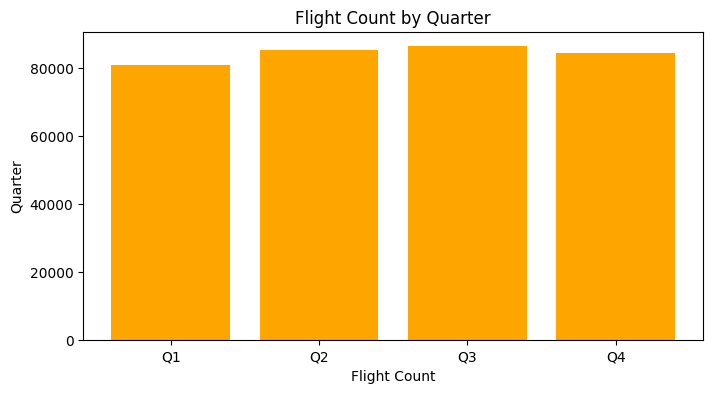

In [234]:
plt.figure(figsize=(8, 4))
plt.bar(quarter_counts['quarter'], quarter_counts['count'],color='orange')
plt.title('Flight Count by Quarter')
plt.xlabel('Flight Count')
plt.ylabel('Quarter')
plt.xticks(quarter_counts['quarter'])
plt.show()

In [235]:
monthly_counts = df['month'].value_counts().sort_index().reset_index()
monthly_counts

,month,count
0,1,27004
1,2,24951
2,3,28834
3,4,28330
4,5,28796
5,6,28243
6,7,29425
7,8,29327
8,9,27574
9,10,28889


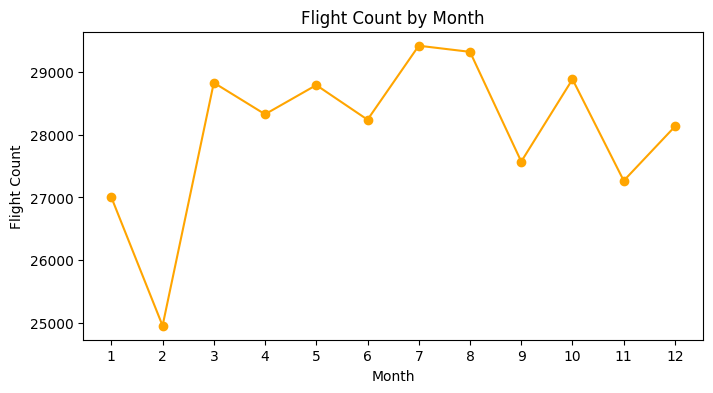

In [236]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_counts['month'], monthly_counts['count'], marker='o', linestyle='-',color='orange')
plt.title('Flight Count by Month')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.xticks(monthly_counts['month'])
plt.show()

In [237]:
week_counts = df['day'].value_counts().sort_index().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_counts['day'] = pd.Categorical(week_counts['day'], categories=day_order, ordered=True)

week_counts = week_counts.sort_values('day').reset_index(drop=True)
week_counts

,day,count
0,Monday,43907
1,Tuesday,55008
2,Wednesday,53838
3,Thursday,50891
4,Friday,44914
5,Saturday,43856
6,Sunday,44362


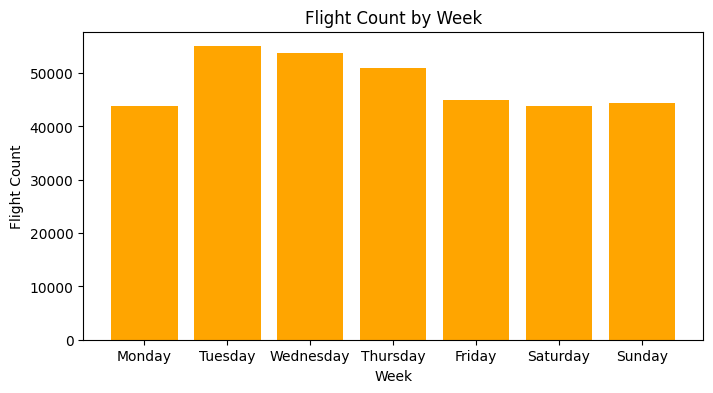

In [238]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_counts['day'] = pd.Categorical(week_counts['day'], categories=day_order, ordered=True)
week_counts = week_counts.sort_values('day')

plt.figure(figsize=(8,4))
plt.bar(week_counts['day'], week_counts['count'],color='orange')
plt.title('Flight Count by Week')
plt.xlabel('Week')
plt.ylabel('Flight Count')
plt.xticks(week_counts['day'])
plt.show()

In [239]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
departure_category_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening']

df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
df['departure_category'] = pd.Categorical(df['departure_category'],categories=departure_category_order,ordered=True)
departure_summary = df.groupby('day')['departure_category'].value_counts().unstack()
departure_summary

departure_category,Early Morning,Morning,Afternoon,Evening
day,,,,
Monday,255,17007,16999,9646
Tuesday,310,20918,21413,12367
Wednesday,328,20838,20940,11732
Thursday,289,19281,19899,11422
Friday,261,17266,17447,9940
Saturday,263,16935,17073,9585
Sunday,248,16822,17388,9904


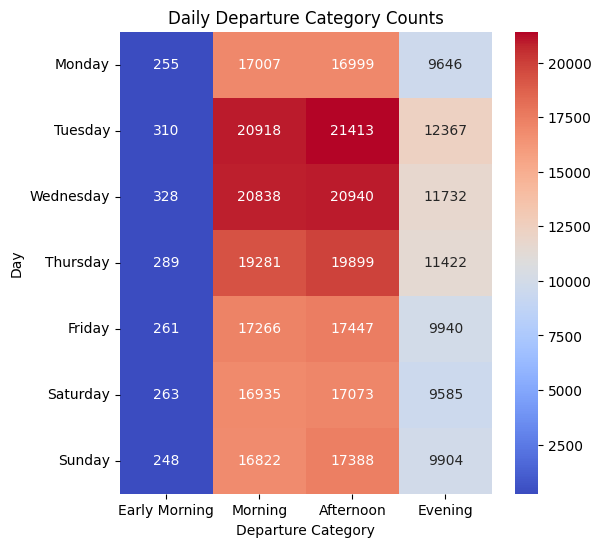

In [240]:
plt.figure(figsize=(6, 6))
sns.heatmap(departure_summary, cmap='coolwarm', annot=True, fmt='g')
plt.title('Daily Departure Category Counts')
plt.xlabel('Departure Category')
plt.ylabel('Day')
plt.show()

In [241]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
arrival_category_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening']

df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
df['arrival_category'] = pd.Categorical(df['arrival_category'],categories=arrival_category_order,ordered=True)
arrival_summary = df.groupby('day')['arrival_category'].value_counts().unstack()
arrival_summary

arrival_category,Early Morning,Morning,Afternoon,Evening
day,,,,
Monday,789,11677,15166,16275
Tuesday,991,14378,18965,20674
Wednesday,998,14393,18601,19846
Thursday,934,13210,17623,19124
Friday,766,11931,15451,16766
Saturday,788,11664,15167,16237
Sunday,813,11589,15288,16672


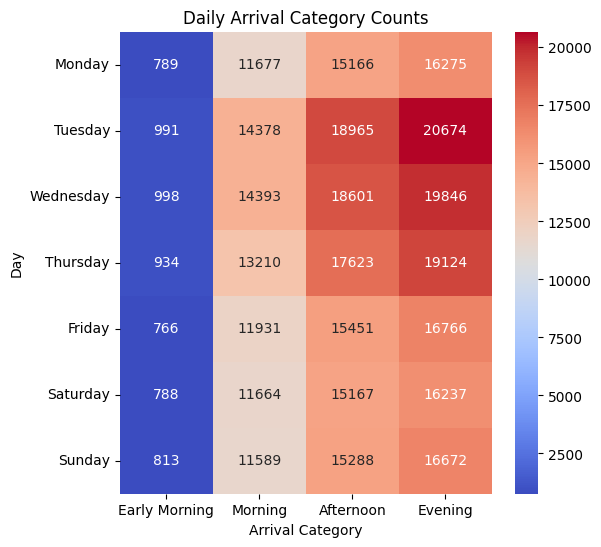

In [242]:
plt.figure(figsize=(6, 6))
sns.heatmap(arrival_summary, cmap='coolwarm', annot=True, fmt='g')
plt.title('Daily Arrival Category Counts')
plt.xlabel('Arrival Category')
plt.ylabel('Day')
plt.show()

In [243]:
month_full_min = df.groupby('month')[['full_minutes','distance',]].agg(['mean','count'])
month_full_min

full_minutes            distance       
              mean  count         mean  count
month                                        
1       141.290253  27004  1006.843616  27004
2       135.159473  24951  1000.982285  24951
3       134.325969  28834  1011.987099  28834
4       137.780551  28330  1038.732580  28330
5       128.693742  28796  1040.912905  28796
6       131.125730  28243  1057.125235  28243
7       130.144775  29425  1058.596398  29425
8       130.743411  29327  1062.138439  29327
9       124.775549  27574  1041.249946  27574
10      131.147842  28889  1038.875904  28889
11      139.997763  27268  1050.305046  27268
12      145.108122  28135  1064.655554  28135

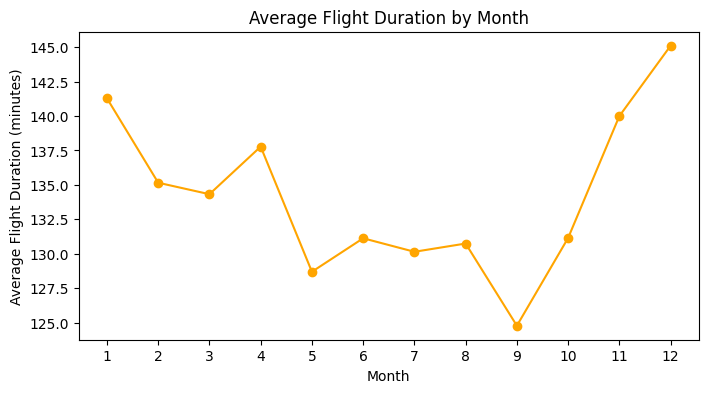

In [244]:
plt.figure(figsize=(8,4))
plt.plot(month_full_min['full_minutes']['mean'],marker='o',linestyle='-',color='orange')
plt.title('Average Flight Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Flight Duration (minutes)')
plt.xticks(month_full_min.index)
plt.show()

In [245]:
order = ['Early', 'On Time', 'Delayed', 'Cancelled']
df['departure_status'] = pd.Categorical(df['departure_status'], categories=order, ordered=True)

dep_status = df.groupby('month')['departure_status'].value_counts().unstack()
dep_status

departure_status,Early,On Time,Delayed,Cancelled
month,,,,
1,15406,1408,9654,536
2,13387,1166,9107,1291
3,15324,1431,11188,891
4,15862,1243,10515,710
5,15540,1391,11264,601
6,13242,1316,12613,1072
7,13127,1428,13827,1043
8,15579,1539,11703,506
9,18055,1237,7778,504


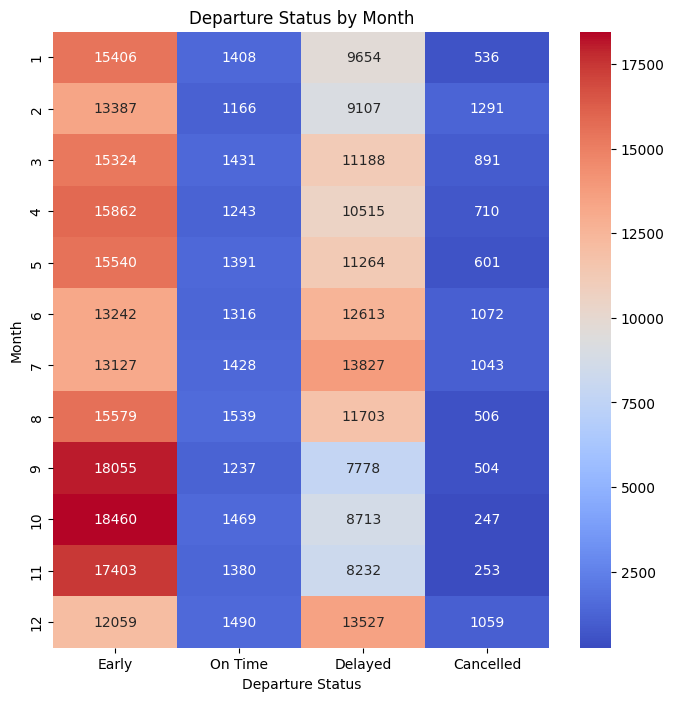

In [246]:
plt.figure(figsize=(8,8))
sns.heatmap(dep_status, cmap='coolwarm', annot=True, fmt='g')
plt.title('Departure Status by Month')
plt.xlabel('Departure Status')
plt.ylabel('Month')
plt.show()

In [247]:
df.groupby('month')['delay_departure_minutes'].mean()

,delay_departure_minutes
month,
1,12.616612
2,12.856639
3,15.339634
4,16.356265
5,15.301604
6,22.157349
7,22.823551
8,14.855185
9,10.017879


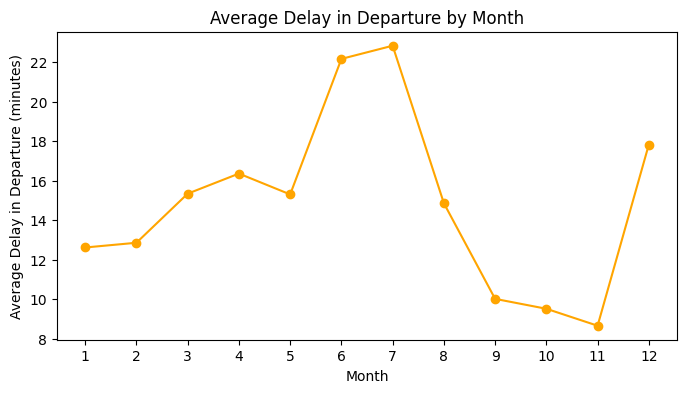

In [248]:
plt.figure(figsize=(8,4))
plt.plot(df.groupby('month')['delay_departure_minutes'].mean(),marker='o',linestyle='-',color='orange')
plt.title('Average Delay in Departure by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay in Departure (minutes)')
plt.xticks(df.groupby('month')['delay_departure_minutes'].mean().index)
plt.show()

In [249]:
df.groupby('month')['early_departure_minutes'].mean()

,early_departure_minutes
month,
1,2.798622
2,2.636247
3,2.566727
4,2.831768
5,2.653424
6,2.205254
7,2.034630
8,2.484025
9,3.497244


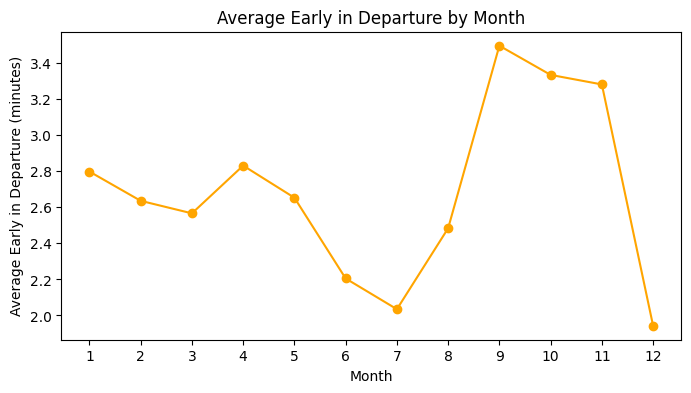

In [250]:
plt.figure(figsize=(8,4))
plt.plot(df.groupby('month')['early_departure_minutes'].mean(),marker='o',linestyle='-',color='orange')
plt.title('Average Early in Departure by Month')
plt.xlabel('Month')
plt.ylabel('Average Early in Departure (minutes)')
plt.xticks(df.groupby('month')['early_departure_minutes'].mean().index)
plt.show()

In [251]:
df.groupby('quarter')['origin_airport_code'].value_counts().unstack()

origin_airport_code,EWR,JFK,LGA
quarter,,,
Q1,29420,27279,24090
Q2,31298,28087,25984
Q3,30384,28914,27028
Q4,29733,26999,27560


Text(0.5, 14.722222222222216, 'Origin Airport Code')

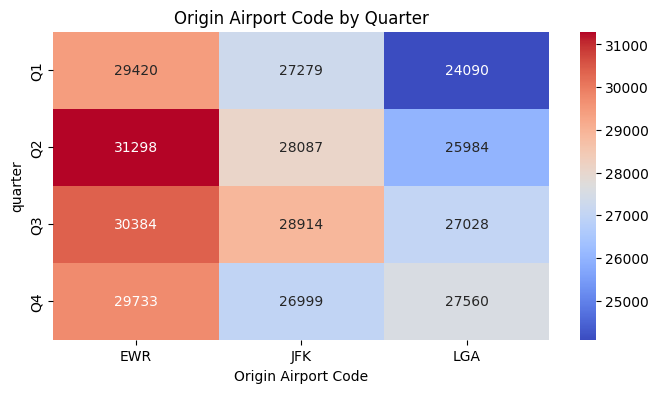

In [252]:
plt.figure(figsize=(8,4))
sns.heatmap(df.groupby('quarter')['origin_airport_code'].value_counts().unstack(), cmap='coolwarm', annot=True, fmt='g')
plt.title('Origin Airport Code by Quarter')
plt.xlabel('Origin Airport Code')

In [253]:
df_grouped = df.groupby('quarter')['dest_airport_code'].value_counts().unstack()
top_10_airports = df['dest_airport_code'].value_counts().nlargest(10).index

df_top_10 = df_grouped[top_10_airports]
df_top_10

dest_airport_code,ORD,ATL,LAX,BOS,MCO,CLT,SFO,FLL,MIA,DCA
quarter,,,,,,,,,,
Q1,3809.0,4111.0,3367.0,3751.0,3550.0,3211.0,2564.0,3472.0,2900.0,2621.0
Q2,4545.0,4427.0,4265.0,3944.0,3508.0,3460.0,3514.0,2932.0,2916.0,2496.0
Q3,4759.0,4382.0,4389.0,4062.0,3541.0,3716.0,3693.0,2684.0,2865.0,2387.0
Q4,4170.0,4295.0,4153.0,3751.0,3483.0,3677.0,3560.0,2967.0,3047.0,2201.0


Text(0.5, 14.722222222222216, 'Destination Airport Code')

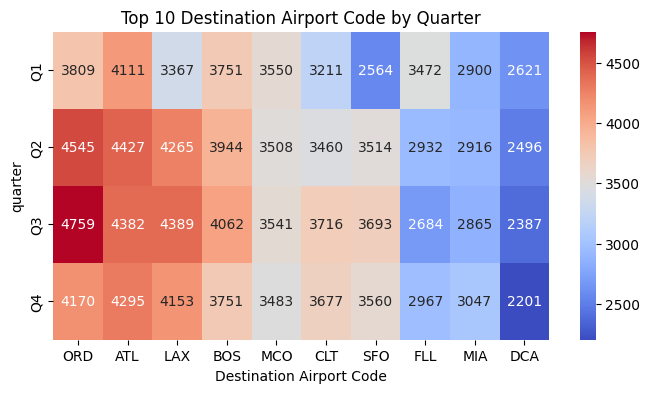

In [254]:
plt.figure(figsize=(8,4))
sns.heatmap(df_top_10, cmap='coolwarm', annot=True, fmt='g')
plt.title('Top 10 Destination Airport Code by Quarter')
plt.xlabel('Destination Airport Code')

In [255]:
df_airline = df.groupby('quarter')['airline'].value_counts().unstack()

top_10_airlines = df['airline'].value_counts().nlargest(5).index

df_top_10_airline = df_airline[top_10_airlines]
df_top_10_airline

airline,United Air Lines Inc.,JetBlue Airways,ExpressJet Airlines Inc.,Delta Air Lines Inc.,American Airlines Inc.
quarter,,,,,
Q1,13954,13302,12724,11323,8098
Q2,14982,13715,13834,12300,8282
Q3,14884,14227,13929,12452,8352
Q4,14845,13391,13686,12035,7997


Text(0.5, 14.722222222222216, 'Airline')

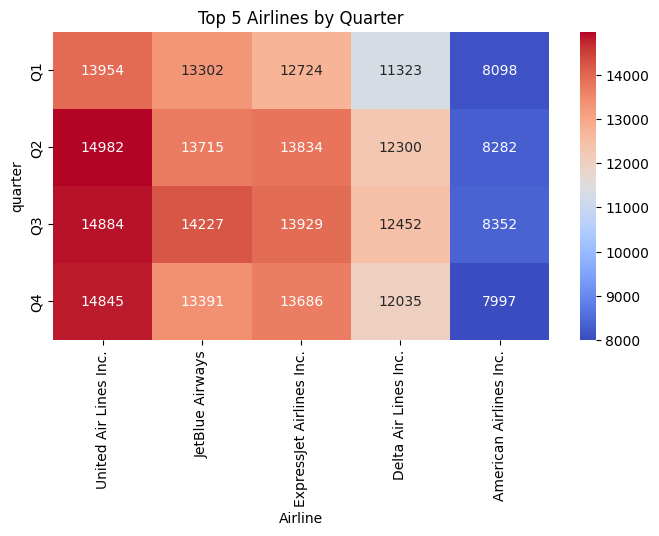

In [256]:
plt.figure(figsize=(8,4))
sns.heatmap(df_top_10_airline, cmap='coolwarm', annot=True, fmt='g')
plt.title('Top 5 Airlines by Quarter')
plt.xlabel('Airline')

In [257]:
order = ['Early', 'On Time', 'Delayed', 'Cancelled']
df['arrival_status'] = pd.Categorical(df['arrival_status'], categories=order, ordered=True)

arr_status = df.groupby('month')['arrival_status'].value_counts().unstack()
arr_status

arrival_status,Early,On Time,Delayed,Cancelled
month,,,,
1,14719,505,11233,547
2,13072,412,10162,1305
3,16519,430,10979,906
4,14509,466,12639,716
5,17433,380,10369,614
6,14098,406,12647,1092
7,14514,401,13456,1054
8,16534,478,11797,518
9,19711,384,6967,512


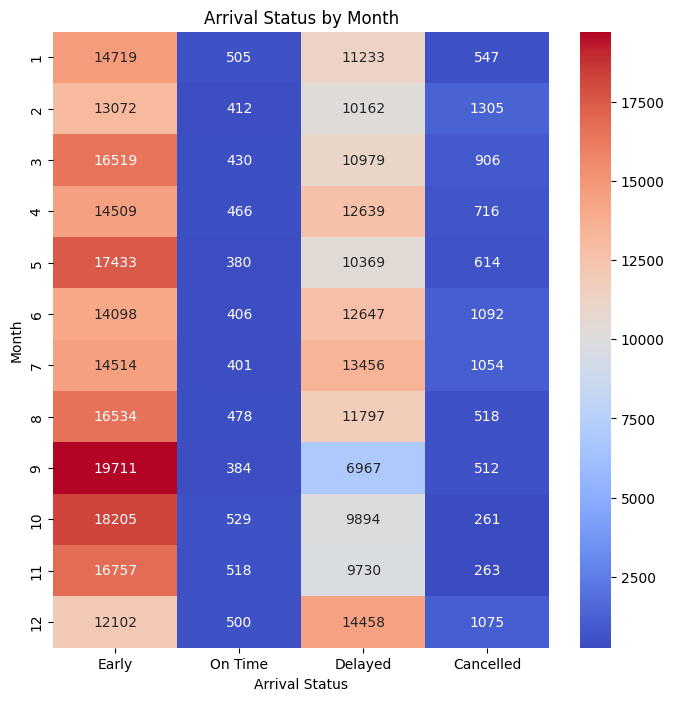

In [258]:
plt.figure(figsize=(8,8))
sns.heatmap(arr_status, cmap='coolwarm', annot=True, fmt='g')
plt.title('Arrival Status by Month')
plt.xlabel('Arrival Status')
plt.ylabel('Month')
plt.show()

In [259]:
df.groupby('month')['delay_arrival_minutes'].mean()

,delay_arrival_minutes
month,
1,15.786106
2,15.159753
3,17.093362
4,22.580198
5,21.072823
6,28.280742
7,28.401257
8,21.147202
9,13.478313


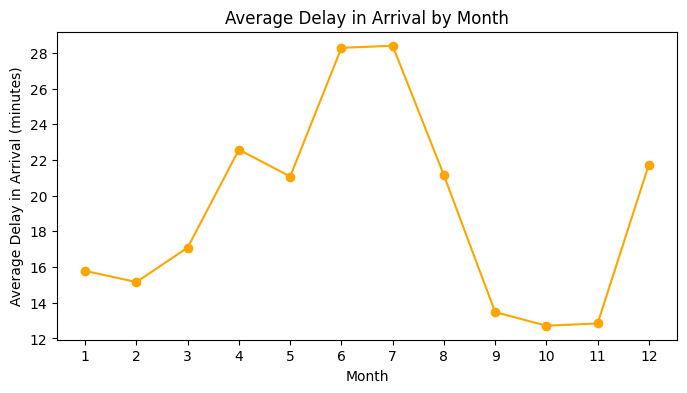

In [260]:
plt.figure(figsize=(8,4))
plt.plot(df.groupby('month')['delay_arrival_minutes'].mean(),marker='o',linestyle='-',color='orange')
plt.title('Average Delay in Arrival by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay in Arrival (minutes)')
plt.xticks(df.groupby('month')['delay_arrival_minutes'].mean().index)
plt.show()

In [261]:
df.groupby('month')['early_arrival_minutes'].mean()

,early_arrival_minutes
month,
1,8.259739
2,8.302713
3,9.736630
4,7.984433
5,11.325462
6,7.958680
7,8.301716
8,9.661541
9,13.525386


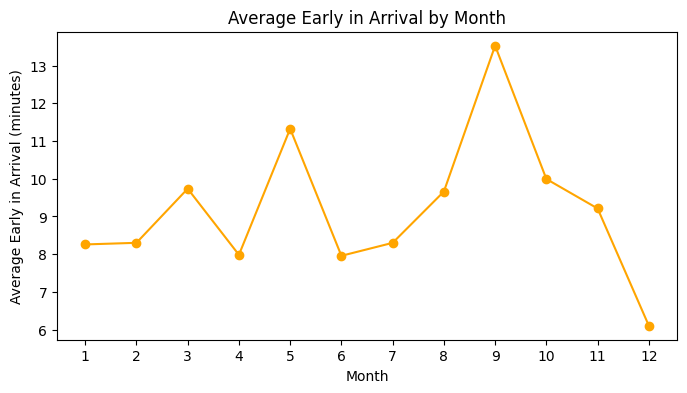

In [262]:
plt.figure(figsize=(8,4))
plt.plot(df.groupby('month')['early_arrival_minutes'].mean(),marker='o',linestyle='-',color='orange')
plt.title('Average Early in Arrival by Month')
plt.xlabel('Month')
plt.ylabel('Average Early in Arrival (minutes)')
plt.xticks(df.groupby('month')['early_arrival_minutes'].mean().index)
plt.show()

## **Departure**

In [263]:
departure_cat_count = df['departure_category'].value_counts().sort_index().reset_index()
departure_cat_count_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening']
departure_cat_count['departure_category'] = pd.Categorical(departure_cat_count['departure_category'], categories=departure_cat_count_order, ordered=True)
departure_cat_count = departure_cat_count.sort_values('departure_category').reset_index(drop=True)
departure_cat_count

,departure_category,count
0,Early Morning,1954
1,Morning,129067
2,Afternoon,131159
3,Evening,74596


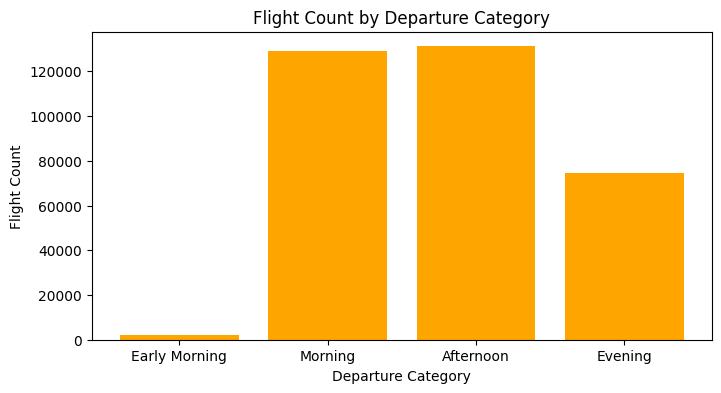

In [264]:
plt.figure(figsize=(8,4))
plt.bar(departure_cat_count['departure_category'], departure_cat_count['count'],color='orange')
plt.xlabel('Departure Category')
plt.ylabel('Flight Count')
plt.title('Flight Count by Departure Category')
plt.show()

In [265]:
df.groupby('departure_category')[['full_minutes','distance']].agg(['mean','count'])

full_minutes             distance        
                           mean   count         mean   count
departure_category                                          
Early Morning        164.745650    1954  1237.596213    1954
Morning              135.639404  129067  1062.473800  129067
Afternoon            133.746163  131159  1023.995906  131159
Evening              131.323194   74596  1023.684366   74596

In [266]:
df.groupby('departure_category')['departure_status'].value_counts().unstack()

departure_status,Early,On Time,Delayed,Cancelled
departure_category,,,,
Early Morning,1349,106,489,10
Morning,87450,6927,32506,2184
Afternoon,63022,6484,57867,3786
Evening,31623,2981,37259,2733


In [267]:
df.groupby('departure_category')['origin_airport_code'].value_counts().unstack()

origin_airport_code,EWR,JFK,LGA
departure_category,,,
Early Morning,896,750,308
Morning,46831,38191,44045
Afternoon,48518,42645,39996
Evening,24590,29693,20313


In [268]:
df.groupby('departure_category')['airline'].value_counts().groupby(level=0,group_keys=False).nlargest(5).unstack(fill_value=0)

airline,United Air Lines Inc.,JetBlue Airways,American Airlines Inc.,US Airways Inc.,ExpressJet Airlines Inc.,Delta Air Lines Inc.,Endeavor Air Inc.
departure_category,,,,,,,
Early Morning,840,376,365,342,31,0,0
Morning,23178,20356,13083,0,20714,19218,0
Afternoon,22673,18660,14568,0,21012,18014,0
Evening,11974,15243,0,0,12416,10878,6282


## **Arrival**

In [269]:
arrival_cat_count = df['arrival_category'].value_counts().sort_index().reset_index()
arrival_cat_count_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening']
arrival_cat_count['arrival_category'] = pd.Categorical(arrival_cat_count['arrival_category'], categories=arrival_cat_count_order, ordered=True)
arrival_cat_count = arrival_cat_count.sort_values('arrival_category').reset_index(drop=True)
arrival_cat_count

,arrival_category,count
0,Early Morning,6079
1,Morning,88842
2,Afternoon,116261
3,Evening,125594


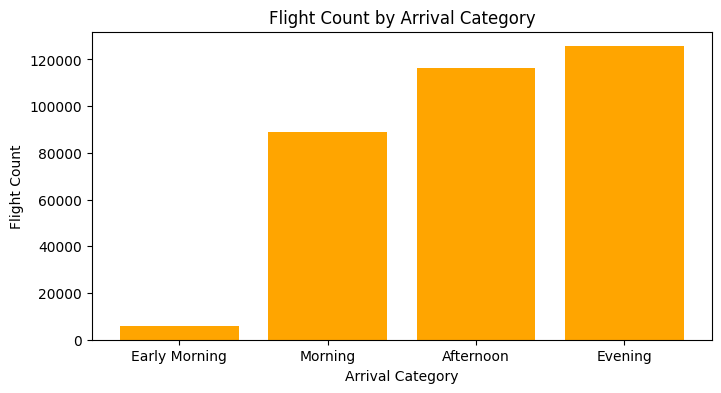

In [270]:
plt.figure(figsize=(8,4))
plt.bar(arrival_cat_count['arrival_category'], arrival_cat_count['count'],color='orange')
plt.xlabel('Arrival Category')
plt.ylabel('Flight Count')
plt.title('Flight Count by Arrival Category')
plt.show()

In [271]:
df.groupby('arrival_category')[['full_minutes','distance']].agg(['mean','count'])

full_minutes             distance        
                         mean   count         mean   count
arrival_category                                          
Early Morning      178.315512    6079  1368.822175    6079
Morning            127.826760   88842   962.657381   88842
Afternoon          131.347872  116261   992.166470  116261
Evening            138.984999  125594  1122.839180  125594

In [272]:
df.groupby('arrival_category')['dest_airport_code'].value_counts().groupby(level=0,group_keys=False).nlargest(5).unstack(fill_value=0)

dest_airport_code,SJU,FLL,LAX,BQN,PSE,ORD,CLT,ATL,BOS,MCO,SFO
arrival_category,,,,,,,,,,,
Early Morning,1068,870,778,607,365,0,0,0,0,0,0
Morning,0,0,0,0,0,6244,4843,4819,4519,3583,0
Afternoon,0,0,5611,0,0,5575,5489,6443,5591,0,0
Evening,0,0,6744,0,0,5462,0,5941,0,5470,5771


In [273]:
df.groupby('arrival_category')['airline'].value_counts().groupby(level=0,group_keys=False).nlargest(5).unstack(fill_value=0)

airline,JetBlue Airways,United Air Lines Inc.,Delta Air Lines Inc.,American Airlines Inc.,ExpressJet Airlines Inc.,Envoy Air
arrival_category,,,,,,
Early Morning,4167,967,584,355,5,0
Morning,13914,16243,11742,8295,15904,0
Afternoon,16880,19700,14103,0,19962,11409
Evening,19674,21755,21681,13096,18302,0


In [274]:
df.groupby('arrival_category')['arrival_status'].value_counts().unstack()

arrival_status,Early,On Time,Delayed,Cancelled
arrival_category,,,,
Early Morning,1950,96,3910,123
Morning,58758,1662,26873,1549
Afternoon,66258,1948,45145,2910
Evening,61207,1703,58403,4281


## **Duration**

In [275]:
total_min = df['full_minutes'].sum()
print(f"Flying hours in 2013: {total_min/60:.2f}")

Flying hours in 2013: 752778.03


In [276]:
avg_duration = df['full_minutes'].mean()
print(f"Average Flight Duration in 2013: {avg_duration:.2f} minutes")
print(f"Average Flight Duration in hours: {avg_duration/60:.2f}")

Average Flight Duration in 2013: 134.11 minutes
Average Flight Duration in hours: 2.24


In [277]:
min = df['full_minutes'].min()
print(f"Minimum Flight Duration: {min:.2f} minutes")

Minimum Flight Duration: 0.00 minutes


In [278]:
max = df['full_minutes'].max()
print(f"Maximum Flight Duration: {max:.2f} minutes")

Maximum Flight Duration: 1165.00 minutes


## **Departure Status**

In [279]:
dep_sts = df['departure_status'].value_counts().reset_index()
dep_sts

,departure_status,count
0,Early,183444
1,Delayed,128121
2,On Time,16498
3,Cancelled,8713


Text(0.5, 1.0, 'Flight Count by Departure Status')

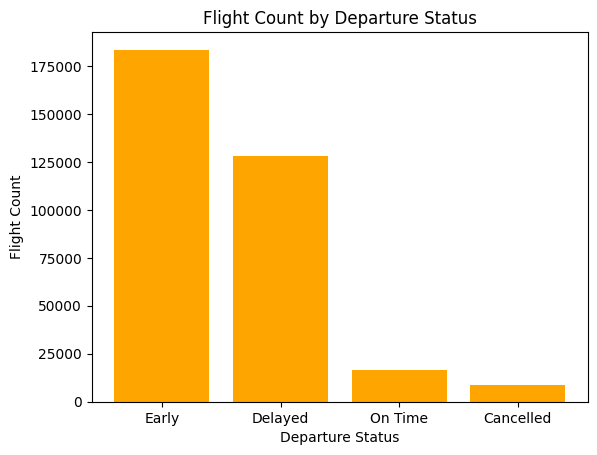

In [280]:
plt.bar(dep_sts['departure_status'], dep_sts['count'],color='orange')
plt.xlabel('Departure Status')
plt.ylabel('Flight Count')
plt.title('Flight Count by Departure Status')

In [281]:
delay_dep_count = df['delay_dep_category'].value_counts().reset_index()
delay_dep_count_order = ['No Delay', 'Minor Delay', 'Moderate Delay', 'Major Delay']
delay_dep_count['delay_dep_category'] = pd.Categorical(delay_dep_count['delay_dep_category'], categories=delay_dep_count_order, ordered=True)
delay_dep_count = delay_dep_count.sort_values('delay_dep_category').reset_index(drop=True)
delay_dep_count

,delay_dep_category,count
0,No Delay,208655
1,Minor Delay,80046
2,Moderate Delay,21650
3,Major Delay,26425


Text(0.5, 1.0, 'Flight Count by Delay Departure Category')

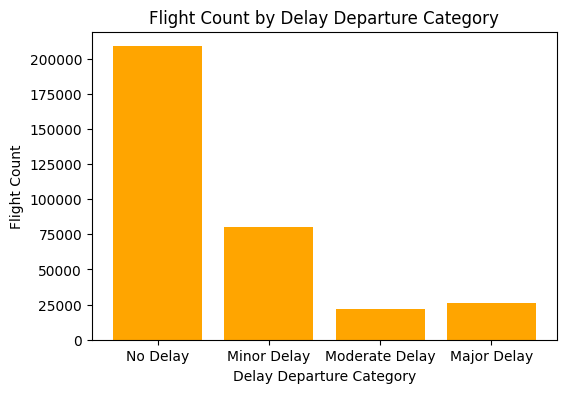

In [282]:
plt.figure(figsize=(6,4))
plt.bar(delay_dep_count['delay_dep_category'], delay_dep_count['count'],color='orange')
plt.xlabel('Delay Departure Category')
plt.ylabel('Flight Count')
plt.title('Flight Count by Delay Departure Category')

In [283]:
early_dep_count = df['early_dep_category'].value_counts().reset_index()
early_dep_count_order = ['No Early', 'Minor Early', 'Moderate Early', 'Major Early']
early_dep_count['early_dep_category'] = pd.Categorical(early_dep_count['early_dep_category'], categories=early_dep_count_order, ordered=True)
early_dep_count = early_dep_count.sort_values('early_dep_category').reset_index(drop=True)
early_dep_count

,early_dep_category,count
0,No Early,153332
1,Minor Early,183441
2,Moderate Early,3


Text(0.5, 1.0, 'Flight Count by Early Departure Category')

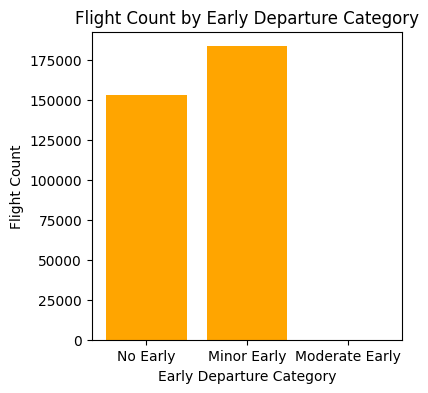

In [284]:
plt.figure(figsize=(4,4))
plt.bar(early_dep_count['early_dep_category'], early_dep_count['count'],color='orange')
plt.xlabel('Early Departure Category')
plt.ylabel('Flight Count')
plt.title('Flight Count by Early Departure Category')

In [285]:
avg_delay_dep = df['delay_departure_minutes'].mean()
print(f"Average Delay in Departure: {avg_delay_dep:.2f} minutes")

Average Delay in Departure: 14.93 minutes


In [286]:
avg_early_dep =  df['early_departure_minutes'].mean()
print(f"Average Early Departure: {avg_early_dep:.2f} minutes")

Average Early Departure: 2.68 minutes


## **From**

In [287]:
from_count = df['origin_airport_code'].value_counts().reset_index()
from_count

,origin_airport_code,count
0,EWR,120835
1,JFK,111279
2,LGA,104662


Text(0.5, 1.0, 'Flight Count by Origin Airport Code')

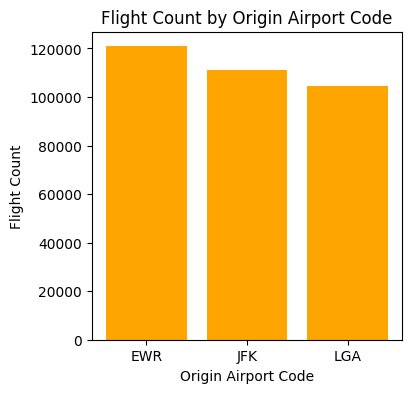

In [288]:
plt.figure(figsize=(4,4))
plt.bar(from_count['origin_airport_code'], from_count['count'],color='orange')
plt.xlabel('Origin Airport Code')
plt.ylabel('Flight Count')
plt.title('Flight Count by Origin Airport Code')

In [289]:
df['origin_city'].value_counts().reset_index()

,origin_city,count
0,New York City,215941
1,Newark,120835


In [290]:
df['origin_state'].value_counts().reset_index()

,origin_state,count
0,New York,215941
1,New Jersey,120835


In [291]:
df.groupby('origin_airport_code')['delay_dep_category'].value_counts().unstack()

delay_dep_category,Major Delay,Minor Delay,Moderate Delay,No Delay
origin_airport_code,,,,
EWR,10874,32772,8951,68238
JFK,8350,26761,6828,69340
LGA,7201,20513,5871,71077


In [292]:
df.groupby('origin_airport_code')['early_dep_category'].value_counts().unstack()

early_dep_category,Minor Early,Moderate Early,No Early
origin_airport_code,,,
EWR,59269.0,NaN,61566.0
JFK,61110.0,1.0,50168.0
LGA,63062.0,2.0,41598.0


In [293]:
df.groupby('origin_airport_code')['delay_departure_minutes'].mean()

,delay_departure_minutes
origin_airport_code,
EWR,16.916655
JFK,14.288464
LGA,13.333684


In [294]:
df.groupby('origin_airport_code')['early_departure_minutes'].mean()

,early_departure_minutes
origin_airport_code,
EWR,2.303248
JFK,2.459727
LGA,3.362433


In [295]:
df.groupby('origin_airport_code')['departure_status'].value_counts().unstack()

departure_status,Early,On Time,Delayed,Cancelled
origin_airport_code,,,,
EWR,59269,5579,52597,3390
JFK,61111,6234,41939,1995
LGA,63064,4685,33585,3328


In [296]:
df.groupby('origin_airport_code')['dest_airport_code'].value_counts().groupby(level=0,group_keys=False).nlargest(5).unstack(fill_value=0)

dest_airport_code,ORD,BOS,SFO,CLT,ATL,LAX,MCO,SJU,MIA,DTW
origin_airport_code,,,,,,,,,,
EWR,6100,5327,5127,5026,5022,0,0,0,0,0
JFK,0,5898,8204,0,0,11262,5464,4752,0,0
LGA,8857,0,0,6168,10263,0,0,0,5781,5040


In [297]:
df.groupby('origin_airport_code')[['full_minutes','distance']].agg(['mean','count'])

full_minutes             distance        
                            mean   count         mean   count
origin_airport_code                                          
EWR                   129.496611  120835  1056.742790  120835
JFK                   148.723721  111279  1266.249077  111279
LGA                   123.914429  104662   779.835671  104662

In [298]:
df.groupby('origin_airport_code')['airline'].value_counts().groupby(level=0,group_keys=False).nlargest(5).unstack(fill_value=0)

airline,United Air Lines Inc.,ExpressJet Airlines Inc.,JetBlue Airways,Southwest Airlines Co.,US Airways Inc.,Delta Air Lines Inc.,Endeavor Air Inc.,American Airlines Inc.,Envoy Air
origin_airport_code,,,,,,,,,
EWR,46087,43939,6557,6188,4405,0,0,0,0
JFK,0,0,42076,0,0,20701,14651,13783,7193
LGA,0,8826,0,0,13136,23067,0,15459,16928


## **To**

In [299]:
to_count = df['dest_airport_code'].value_counts().reset_index()
to_count = to_count.sort_values(by=['count'], ascending=False).head(10)
to_count

,dest_airport_code,count
0,ORD,17283
1,ATL,17215
2,LAX,16174
3,BOS,15508
4,MCO,14082
5,CLT,14064
6,SFO,13331
7,FLL,12055
8,MIA,11728
9,DCA,9705


Text(0.5, 1.0, 'Flight Count by Destination Airport Code')

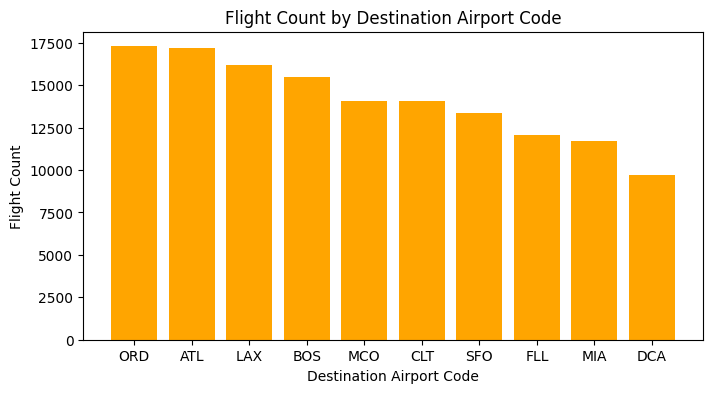

In [300]:
plt.figure(figsize=(8,4))
plt.bar(to_count['dest_airport_code'], to_count['count'],color='orange')
plt.xlabel('Destination Airport Code')
plt.ylabel('Flight Count')
plt.title('Flight Count by Destination Airport Code')

In [301]:
df['dest_city'].value_counts().reset_index().head(10)

,dest_city,count
0,Chicago,21396
1,Atlanta,17215
2,Los Angeles,16174
3,Boston,15508
4,Washington,15405
5,Orlando,14082
6,Charlotte,14064
7,San Francisco,13331
8,Fort Lauderdale,12055
9,Miami,11728


In [302]:
df['dest_state'].value_counts().reset_index().head(10)

,dest_state,count
0,Florida,59370
1,California,35050
2,North Carolina,24218
3,Illinois,21396
4,Texas,21176
5,Georgia,18019
6,Massachusetts,15994
7,D.C.,15405
8,Ohio,14427
9,Michigan,10250


In [303]:
selected_airports = ['ATL', 'ORD', 'LAX','BOS','MCO']

filtered_df = df[df['dest_airport_code'].isin(selected_airports)]

destination_full_distance = (
    filtered_df.groupby('dest_airport_code')[['full_minutes','distance']].agg(['mean','count'])
)

destination_full_distance

full_minutes            distance       
                          mean  count         mean  count
dest_airport_code                                        
ATL                 145.646413  17215   757.108220  17215
BOS                  66.573253  15508   190.636962  15508
LAX                 182.070978  16174  2468.622357  16174
MCO                 165.195711  14082   943.110567  14082
ORD                  87.396980  17283   729.000810  17283

In [304]:
selected_airports = ['ATL', 'ORD', 'LAX','BOS','MCO']

filtered_df = df[df['dest_airport_code'].isin(selected_airports)]

destination_airline = (
    filtered_df.groupby('dest_airport_code')['airline']
    .value_counts()
    .groupby(level=0,group_keys=False)
    .nlargest(5)
    .unstack(fill_value=0)
)

destination_airline

airline,Delta Air Lines Inc.,AirTran Airways Corporation,Envoy Air,ExpressJet Airlines Inc.,United Air Lines Inc.,JetBlue Airways,US Airways Inc.,American Airlines Inc.,Virgin America,Endeavor Air Inc.
dest_airport_code,,,,,,,,,,
ATL,10571,2337,2322,1764,103,0,0,0,0,0
BOS,972,0,0,0,3342,4383,4283,1455,0,0
LAX,2501,0,0,0,5823,1688,0,3582,2580,0
MCO,3663,0,0,0,3217,6472,0,730,0,0
ORD,0,0,2276,0,6984,905,0,6059,0,1056


In [305]:
selected_airports = ['ATL', 'ORD', 'LAX', 'BOS', 'MCO']

filtered_df = df[df['dest_airport_code'].isin(selected_airports)]

delay_arrival_distribution = (
    filtered_df.groupby('dest_airport_code')['delay_arr_category']
    .value_counts()
    .unstack(fill_value=0)
)

delay_arrival_distribution

delay_arr_category,Major Delay,Minor Delay,Moderate Delay,No Delay
dest_airport_code,,,,
ATL,1471,5301,1213,9230
BOS,1090,2858,829,10731
LAX,1102,4009,993,10070
MCO,1042,3597,939,8504
ORD,1575,3527,1134,11047


In [306]:
selected_airports = ['ATL', 'ORD', 'LAX', 'BOS', 'MCO']

filtered_df = df[df['dest_airport_code'].isin(selected_airports)]

early_arrival_distribution = (
    filtered_df.groupby('dest_airport_code')['early_arr_category']
    .value_counts()
    .unstack(fill_value=0)
)

early_arrival_distribution

early_arr_category,Major Early,Minor Early,Moderate Early,No Early
dest_airport_code,,,,
ATL,1,8272,263,8679
BOS,0,9737,295,5476
LAX,39,7726,1909,6500
MCO,2,7543,627,5910
ORD,4,8672,1473,7134


In [307]:
df.groupby('dest_airport_code')['delay_arrival_minutes'].mean().sort_values(ascending=False).reset_index().head(5)

,dest_airport_code,delay_arrival_minutes
0,ROC,86.670530
1,PWM,62.582908
2,BTV,48.542681
3,CAE,38.293103
4,TUL,38.057143


In [308]:
df.groupby('dest_airport_code')['early_arrival_minutes'].mean().sort_values(ascending=False).reset_index().head(5)

,dest_airport_code,early_arrival_minutes
0,LEX,22.000000
1,SNA,15.226667
2,SEA,13.955391
3,PSP,13.947368
4,LGB,13.642216


In [309]:
selected_airports = ['ATL', 'ORD', 'LAX','BOS','MCO']

filtered_df = df[df['dest_airport_code'].isin(selected_airports)]

arrival_status_distribution = (
    filtered_df.groupby('dest_airport_code')['arrival_status']
    .value_counts()
    .unstack(fill_value=0)
)

arrival_status_distribution

arrival_status,Early,On Time,Delayed,Cancelled
dest_airport_code,,,,
ATL,8536,350,7985,344
BOS,10032,211,4777,488
LAX,9674,269,6104,127
MCO,8172,223,5578,109
ORD,10149,222,6236,676


## **Distance/Airline**

In [310]:
miles = df['distance'].mean()
print(f"Average Distance: {miles:.2f} miles")

Average Distance: 1039.91 miles


In [311]:
min = df['distance'].min()
print(f"Minimum Distance: {min:.2f} miles")

Minimum Distance: 17.00 miles


In [312]:
min_distance = df['distance'].min()

min_distance_rows = df[df['distance'] == min_distance]

from_airport = min_distance_rows['origin_airport_code'].iloc[0]
to_airport = min_distance_rows['dest_airport_code'].iloc[0]

print(f"Minimum Distance: {min_distance:.2f} miles")
print(f"From: {from_airport}")
print(f"To: {to_airport}")

Minimum Distance: 17.00 miles
From: EWR
To: LGA


In [313]:
max = df['distance'].max()
print(f"Maximum Distance: {max:.2f} miles")

Maximum Distance: 4983.00 miles


In [314]:
max_distance = df['distance'].max()

max_distance_rows = df[df['distance'] == max_distance]

from_airport = max_distance_rows['origin_airport_code'].iloc[0]
to_airport = max_distance_rows['dest_airport_code'].iloc[0]

print(f"Maximum Distance: {max_distance:.2f} miles")
print(f"From: {from_airport}")
print(f"To: {to_airport}")

Maximum Distance: 4983.00 miles
From: JFK
To: HNL


In [315]:
flight = df['airline'].value_counts().reset_index().head(5)
flight

,airline,count
0,United Air Lines Inc.,58665
1,JetBlue Airways,54635
2,ExpressJet Airlines Inc.,54173
3,Delta Air Lines Inc.,48110
4,American Airlines Inc.,32729


Text(0.5, 1.0, 'Flight Count by Airline')

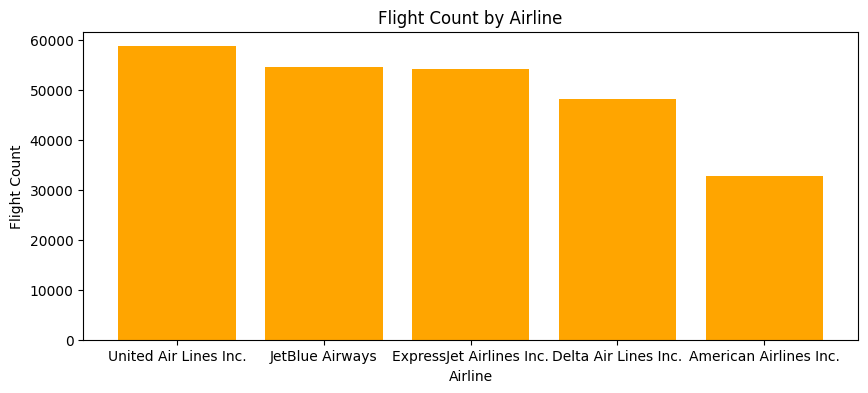

In [316]:
plt.figure(figsize=(10,4))
plt.bar(flight['airline'], flight['count'],color='orange')
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.title('Flight Count by Airline')

In [317]:
df.groupby('airline')[['full_minutes','distance']].agg(['mean','count']).sort_values(by=[('distance','mean'),('full_minutes','mean')],ascending=False).head(5)

full_minutes            distance       
                               mean  count         mean  count
airline                                                       
Hawaiian Airlines Inc.   310.494152    342  4983.000000    342
Virgin America           186.604417   5162  2499.482177   5162
Alaska Airlines Inc.     174.897759    714  2402.000000    714
Frontier Airlines Inc.   146.499270    685  1620.000000    685
United Air Lines Inc.    153.840689  58665  1529.114873  58665

In [318]:
df.groupby('airline')['delay_departure_minutes'].mean().sort_values(ascending=False).reset_index().head(5)

,airline,delay_departure_minutes
0,Frontier Airlines Inc.,22.426277
1,ExpressJet Airlines Inc.,21.365551
2,AirTran Airways Corporation,20.551534
3,Mesa Airlines Inc.,20.409318
4,Southwest Airlines Co.,18.587047


In [319]:
df.groupby('airline')['early_departure_minutes'].mean().sort_values(ascending=False).reset_index().head(5)

,airline,early_departure_minutes
0,SkyWest Airlines Inc.,4.906250
1,Hawaiian Airlines Inc.,4.146199
2,Alaska Airlines Inc.,4.131653
3,US Airways Inc.,4.018261
4,Envoy Air,3.599955


In [320]:
df.groupby('airline')['departure_status'].value_counts().unstack()

departure_status,Early,On Time,Delayed,Cancelled
airline,,,,
AirTran Airways Corporation,1400,131,1650,79
Alaska Airlines Inc.,458,28,226,2
American Airlines Inc.,20315,1605,10139,670
Delta Air Lines Inc.,29649,2866,15231,364
Endeavor Air Inc.,9706,633,7006,1115
Envoy Air,15792,1302,7982,1321
ExpressJet Airlines Inc.,26540,1657,23054,2922
Frontier Airlines Inc.,297,44,340,4
Hawaiian Airlines Inc.,259,14,69,0


In [321]:
df.groupby('airline')['delay_arrival_minutes'].mean().sort_values(ascending=False).reset_index().head(5)

,airline,delay_arrival_minutes
0,JetBlue Airways,29.281029
1,Frontier Airlines Inc.,27.227737
2,AirTran Airways Corporation,24.288344
3,ExpressJet Airlines Inc.,22.209680
4,Mesa Airlines Inc.,21.928453


In [322]:
df.groupby('airline')['early_arrival_minutes'].mean().sort_values(ascending=False).reset_index().head(5)

,airline,early_arrival_minutes
0,Alaska Airlines Inc.,18.957983
1,Hawaiian Airlines Inc.,17.342105
2,Virgin America,13.082139
3,American Airlines Inc.,12.218277
4,Delta Air Lines Inc.,11.231158


In [323]:
df.groupby('airline')['arrival_status'].value_counts().unstack()

arrival_status,Early,On Time,Delayed,Cancelled
airline,,,,
AirTran Airways Corporation,1211,69,1901,79
Alaska Airlines Inc.,512,8,192,2
American Airlines Inc.,20767,472,10813,677
Delta Air Lines Inc.,30339,782,16606,383
Endeavor Air Inc.,10430,227,6684,1119
Envoy Air,12862,488,11719,1328
ExpressJet Airlines Inc.,25823,801,24601,2948
Frontier Airlines Inc.,271,18,392,4
Hawaiian Airlines Inc.,242,4,96,0


## **Arrival Status**

In [324]:
arr_sts = df['arrival_status'].value_counts().reset_index()
arr_sts

,arrival_status,count
0,Early,188173
1,Delayed,134331
2,Cancelled,8863
3,On Time,5409


Text(0.5, 1.0, 'Flight Count by Arrival Status')

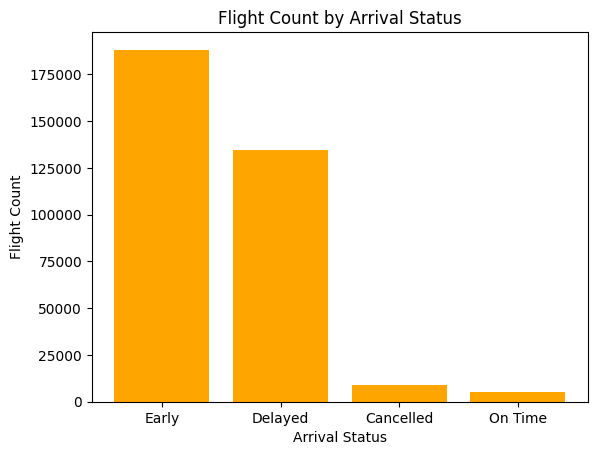

In [325]:
plt.bar(arr_sts['arrival_status'], arr_sts['count'],color='orange')
plt.xlabel('Arrival Status')
plt.ylabel('Flight Count')
plt.title('Flight Count by Arrival Status')

In [326]:
delay_arr_count = df['delay_arr_category'].value_counts().reset_index()
delay_arr_count_order = ['No Delay', 'Minor Delay', 'Moderate Delay', 'Major Delay']
delay_arr_count['delay_arr_category'] = pd.Categorical(delay_arr_count['delay_arr_category'], categories=delay_arr_count_order, ordered=True)
delay_arr_count = delay_arr_count.sort_values('delay_arr_category').reset_index(drop=True)
delay_arr_count

,delay_arr_category,count
0,No Delay,202445
1,Minor Delay,81474
2,Moderate Delay,23721
3,Major Delay,29136


Text(0.5, 1.0, 'Flight Count by Delay Arrival Category')

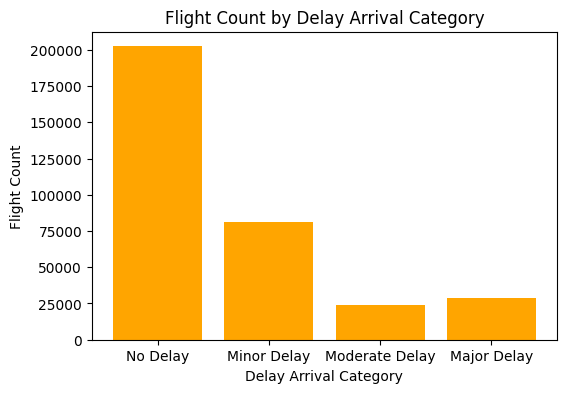

In [327]:
plt.figure(figsize=(6,4))
plt.bar(delay_arr_count['delay_arr_category'], delay_arr_count['count'],color='orange')
plt.xlabel('Delay Arrival Category')
plt.ylabel('Flight Count')
plt.title('Flight Count by Delay Arrival Category')

In [328]:
early_arr_count = df['early_arr_category'].value_counts().reset_index()
early_arr_count_order = ['No Early', 'Minor Early', 'Moderate Early', 'Major Early']
early_arr_count['early_arr_category'] = pd.Categorical(early_arr_count['early_arr_category'], categories=early_arr_count_order, ordered=True)
early_arr_count = early_arr_count.sort_values('early_arr_category').reset_index(drop=True)
early_arr_count

,early_arr_category,count
0,No Early,148603
1,Minor Early,168240
2,Moderate Early,19726
3,Major Early,207


Text(0.5, 1.0, 'Flight Count by Early Arrival Category')

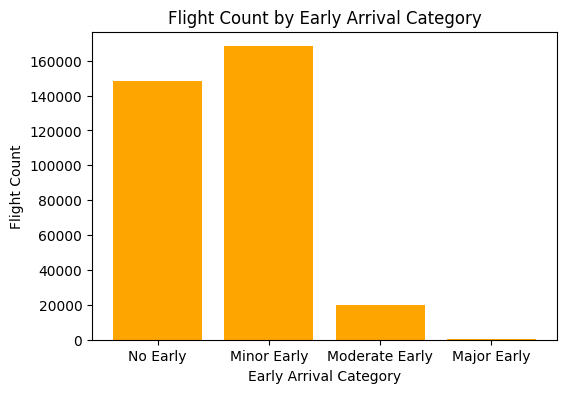

In [329]:
plt.figure(figsize=(6,4))
plt.bar(early_arr_count['early_arr_category'], early_arr_count['count'],color='orange')
plt.xlabel('Early Arrival Category')
plt.ylabel('Flight Count')
plt.title('Flight Count by Early Arrival Category')

In [330]:
avg_delay_arr = df['delay_arrival_minutes'].mean()
print(f"Average Delay in Arrival: {avg_delay_arr:.2f} minutes")

Average Delay in Arrival: 19.30 minutes


In [331]:
avg_early_arr =  df['early_arrival_minutes'].mean()
print(f"Average Early Arrival: {avg_early_arr:.2f} minutes")

Average Early Arrival: 9.21 minutes
